# Bayesian optimization of a time-consuming simulator

O. Roustant, INSA Toulouse

The aim of the lab is to optimize a time-consuming simulator using the Efficient Global Optimization (EGO) method. As a toy example, the simulator chosen here mimics a catapult. There are 4 input variables, tuning the catapult, and 1 output, giving the distance of the projectile mark to the catapult. We want to find the value(s) of the input variable(s) maximizing that distance. Notice that the simulator is not time-consuming. However, for the sake of realism, we will limit the computational budget to 36 runs.

## "By-hand" Optimization
<br> We provide here a shiny application created by Nicolas Durrande, which allows using the simulator interactively. Alternatively, you can use the web application, available here : https://durrande.shinyapps.io/catapult/

In [1]:
library(shiny)
# runApp()

*Question: By playing with the simulator, propose a set of input values giving the largest possible value of the output. Here we consider the noise-free case, by fixing the wind to zero.*

To continue running the notebook, you may need to interrupt the kernel (square symbol!). Then load the two following scripts, containing useful functions. 

In [2]:
source("catapultSettings.R")
source("catapultFunctions.R")

## Design of experiments
Let us create an initial design of experiments and compute the corresponding values.

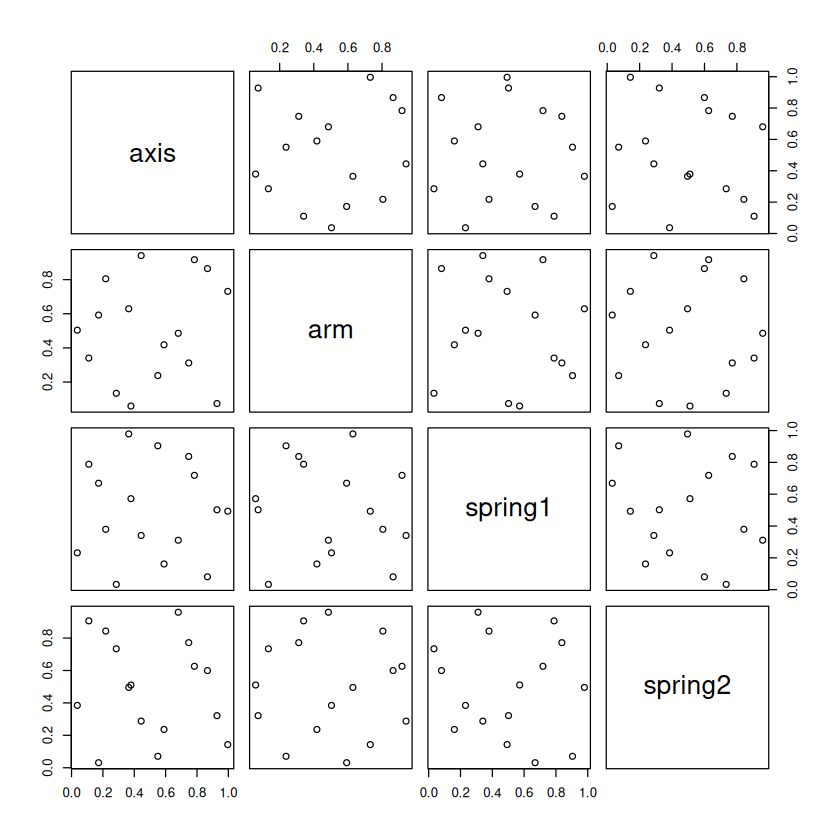

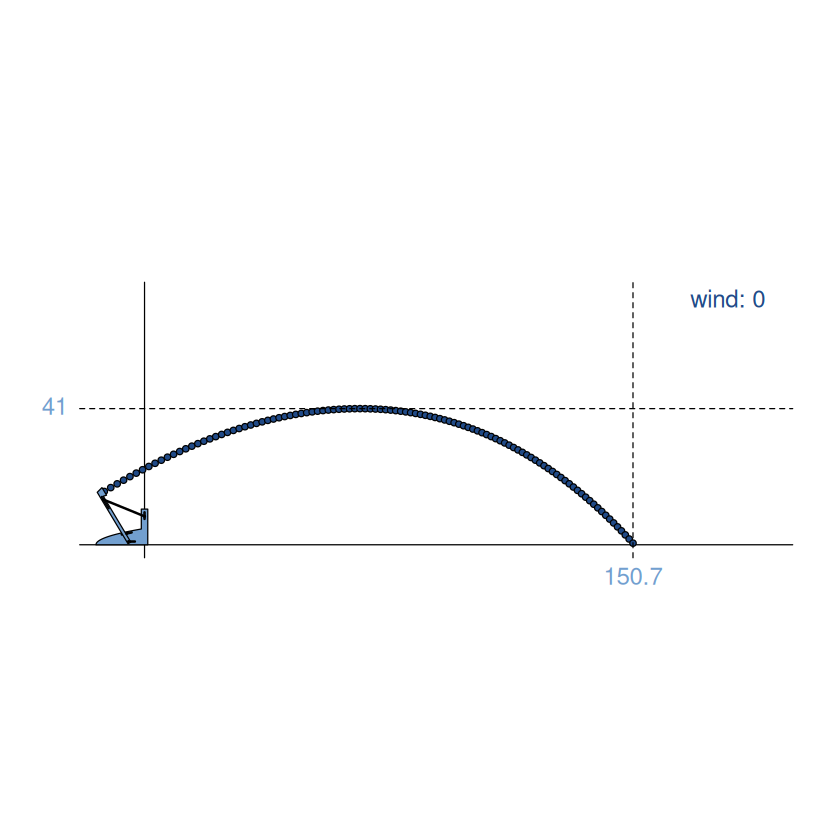

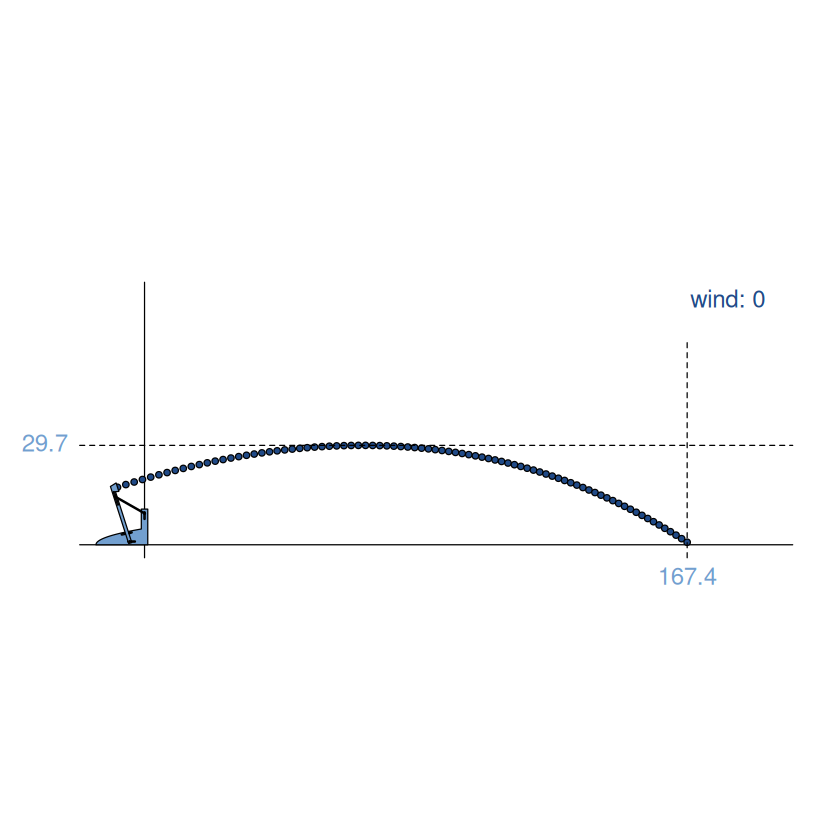

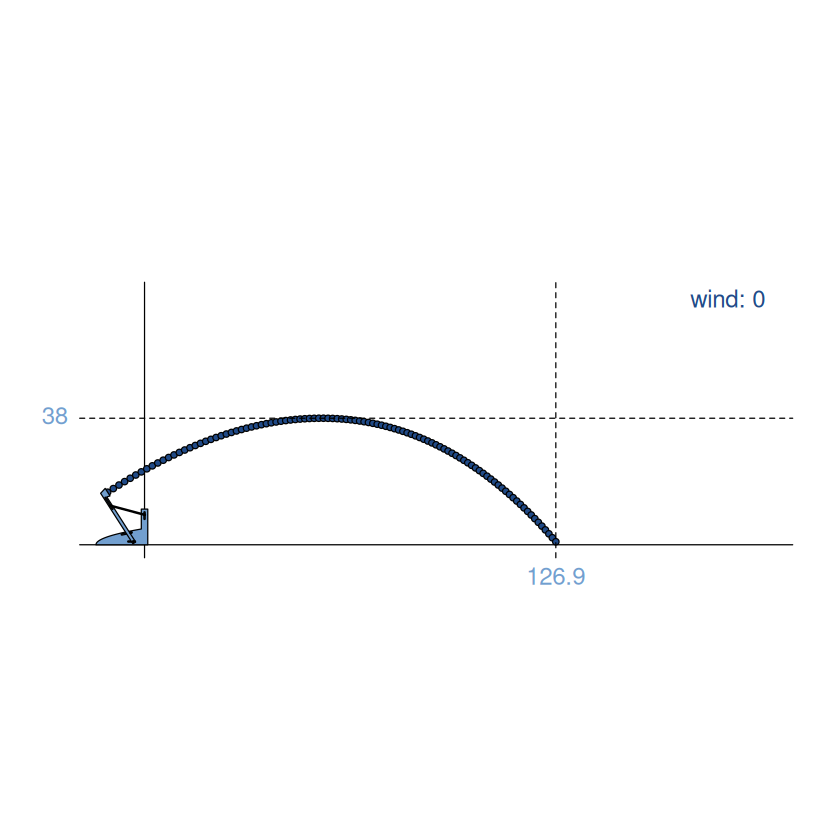

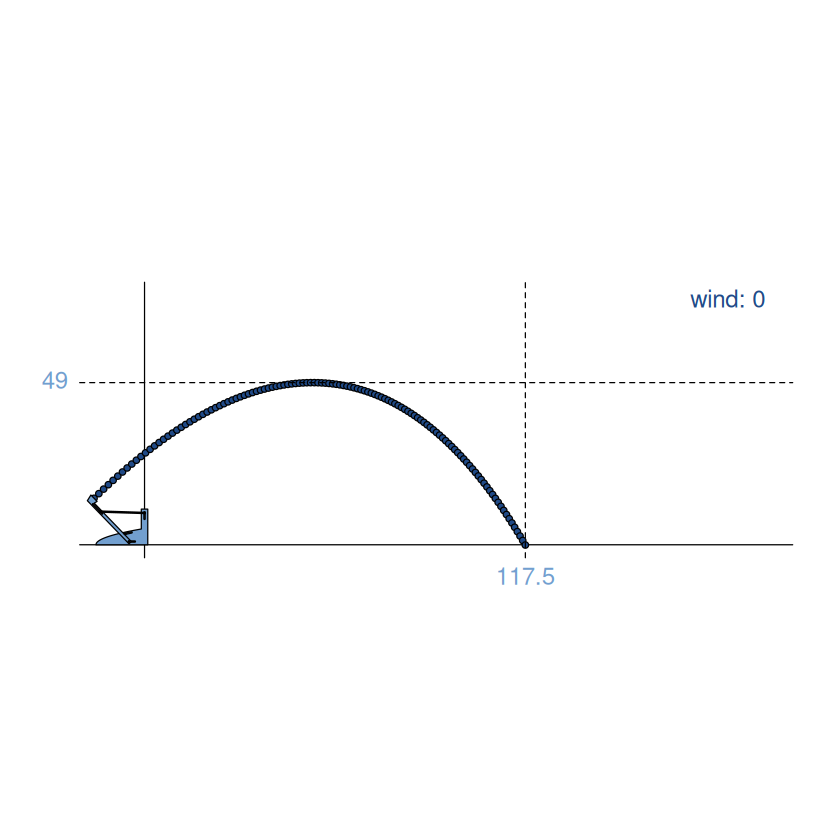

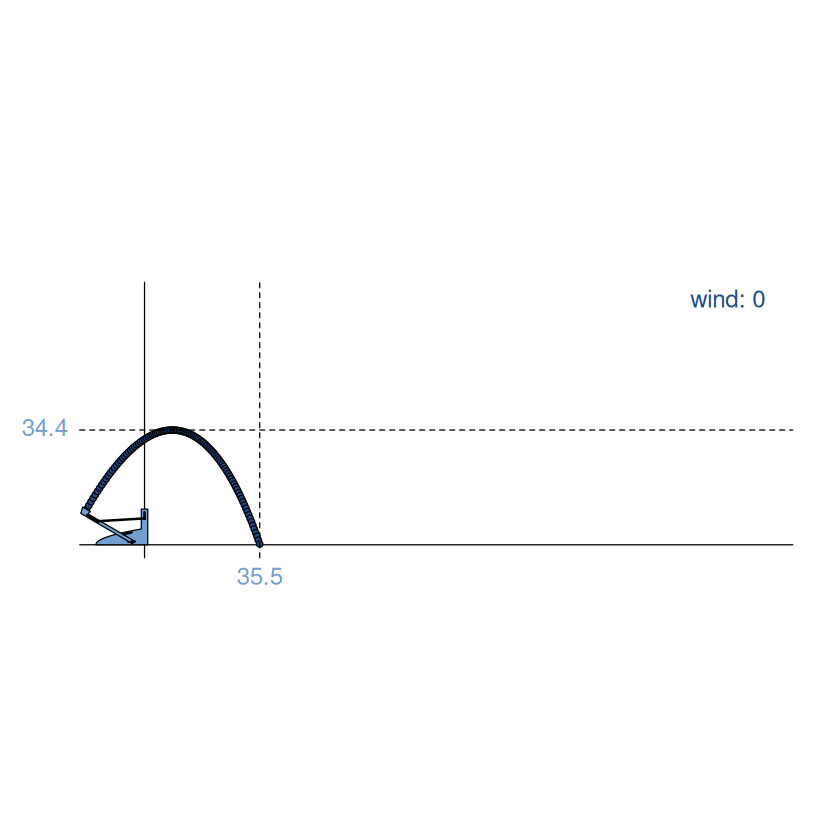

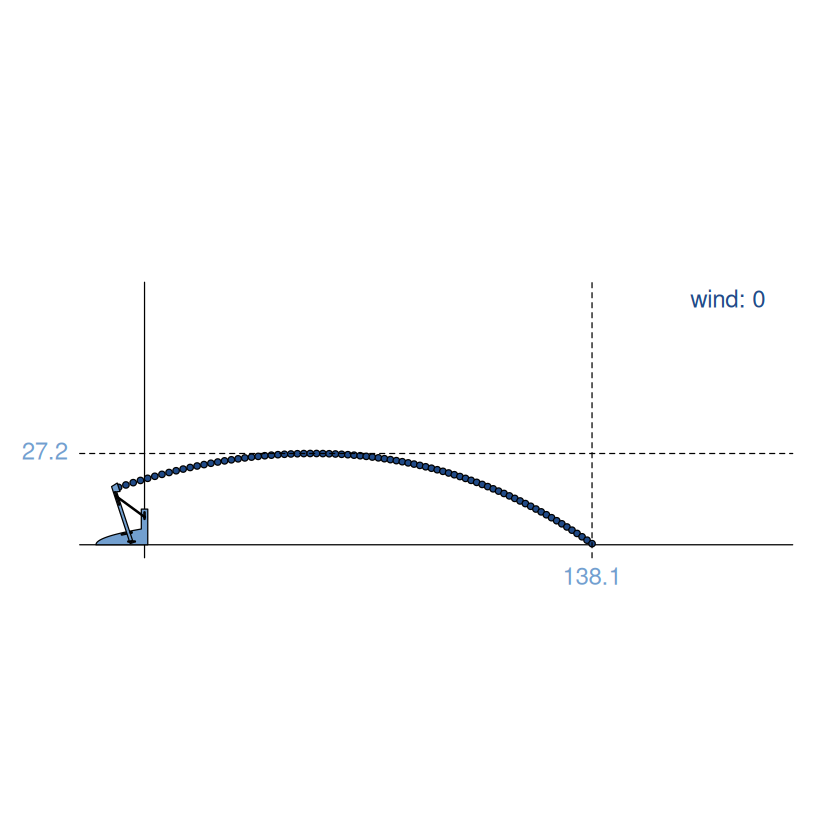

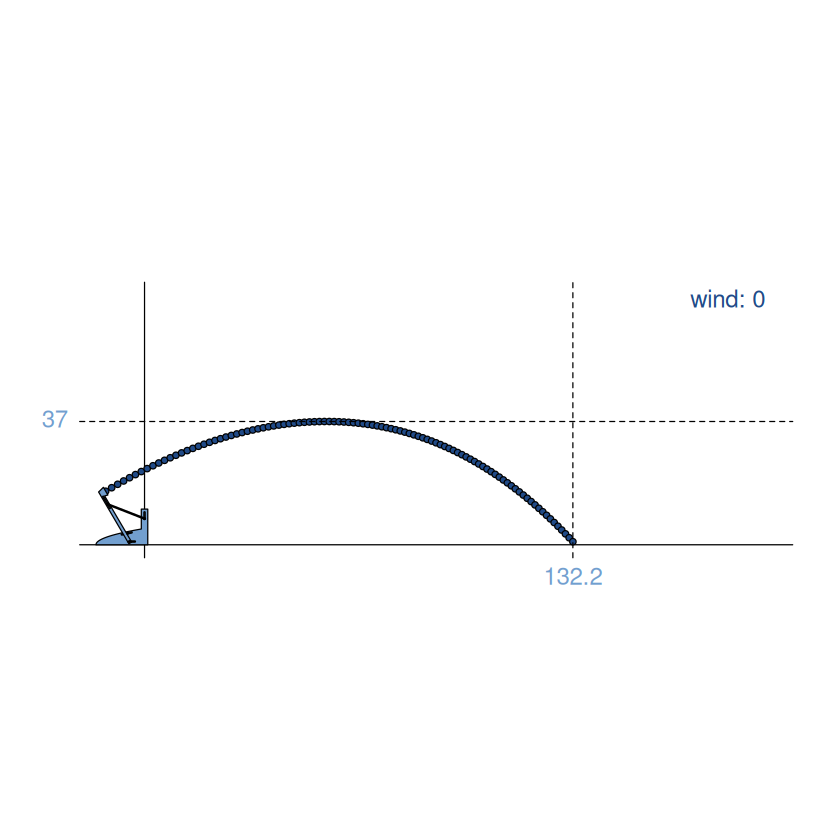

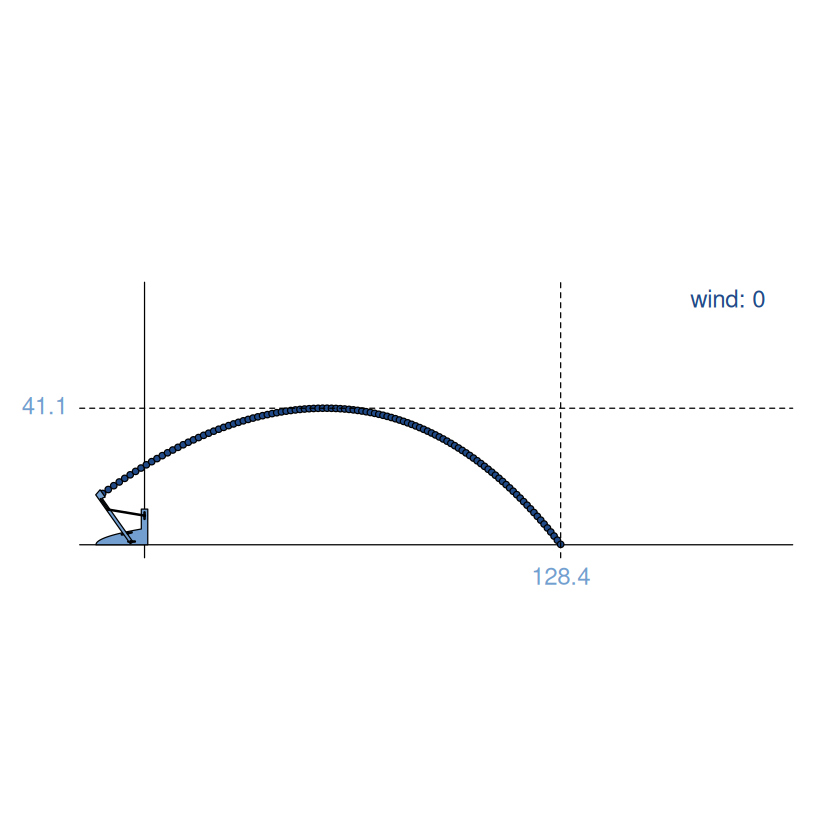

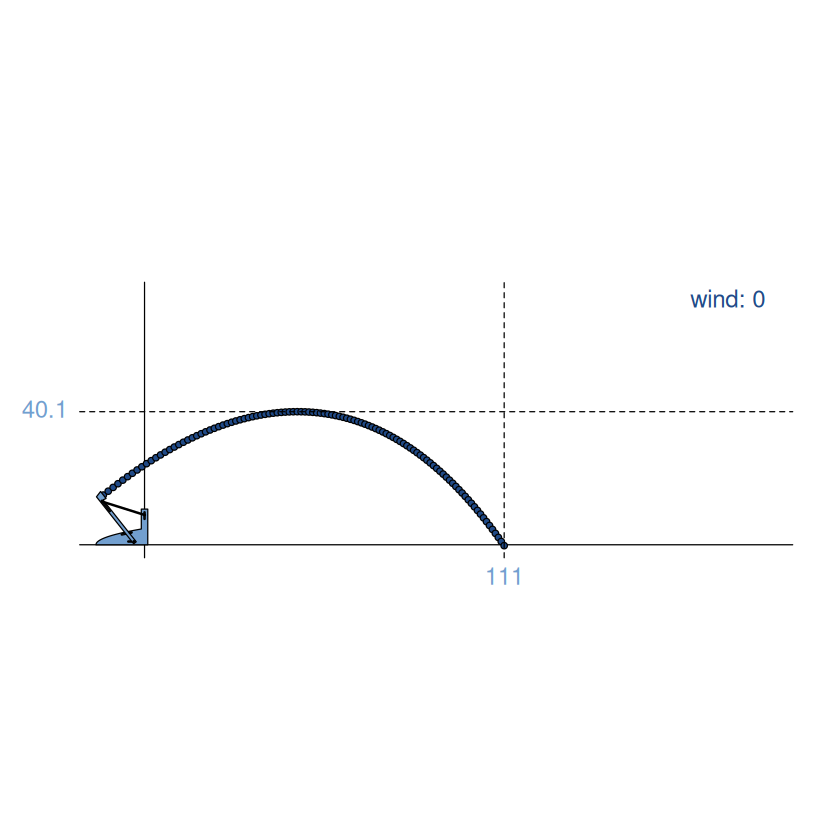

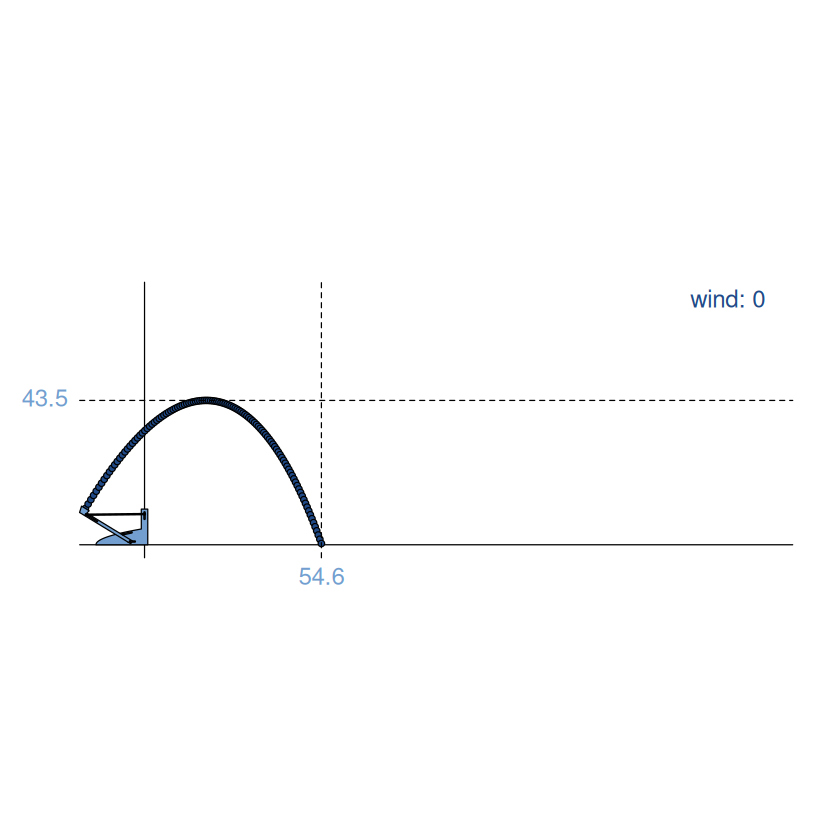

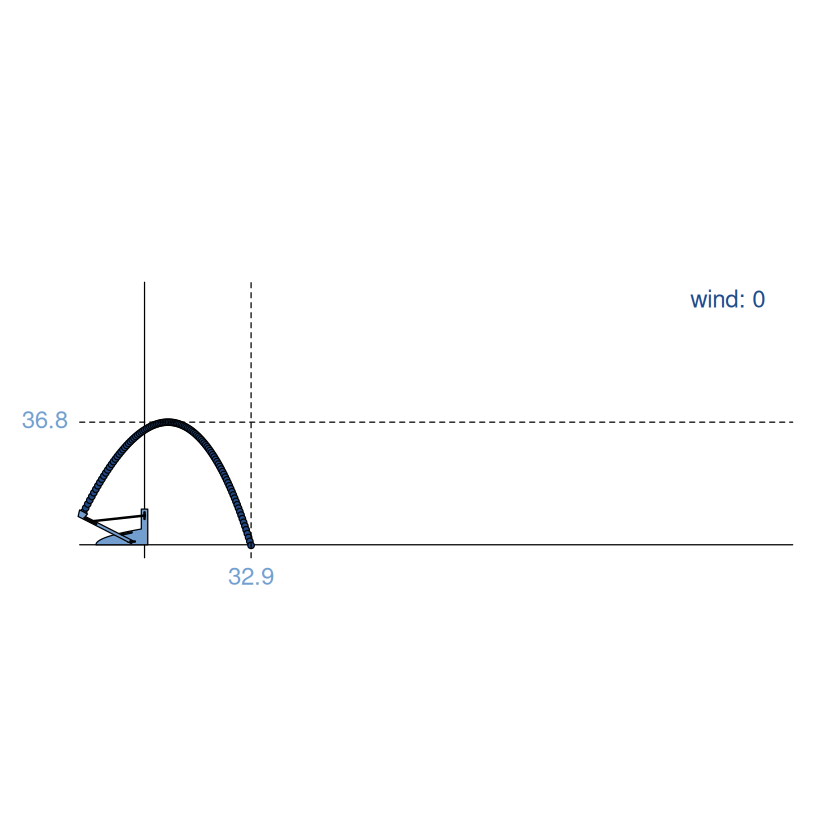

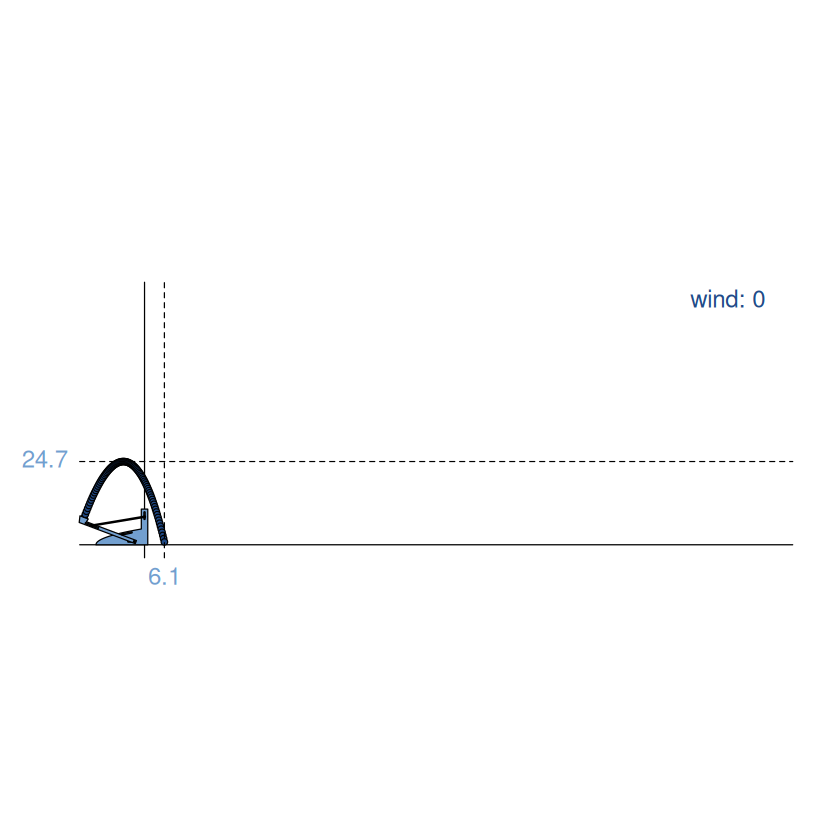

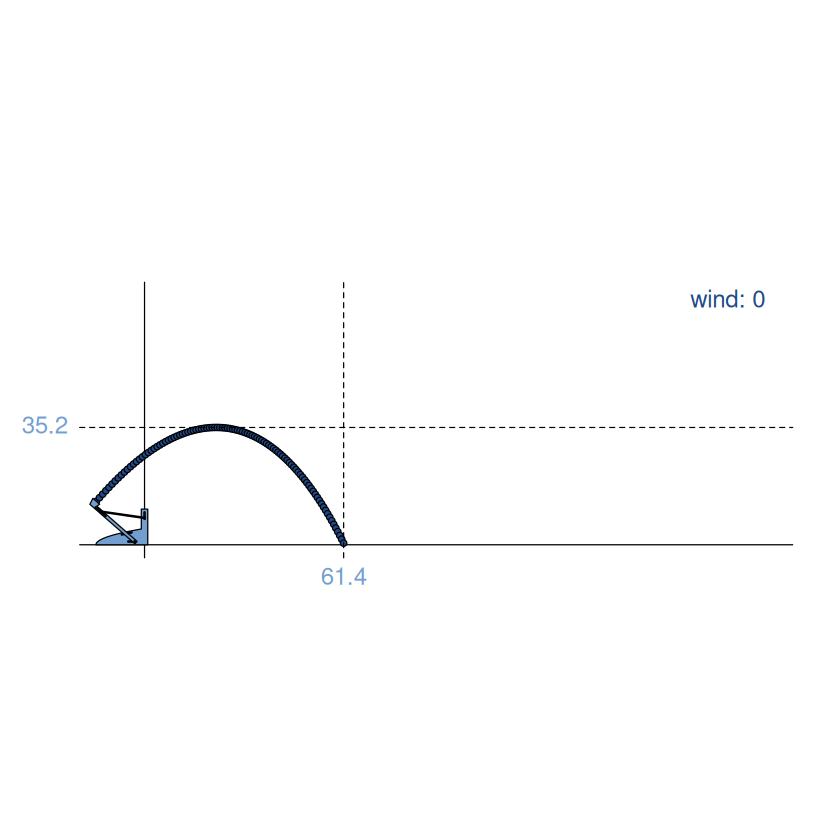

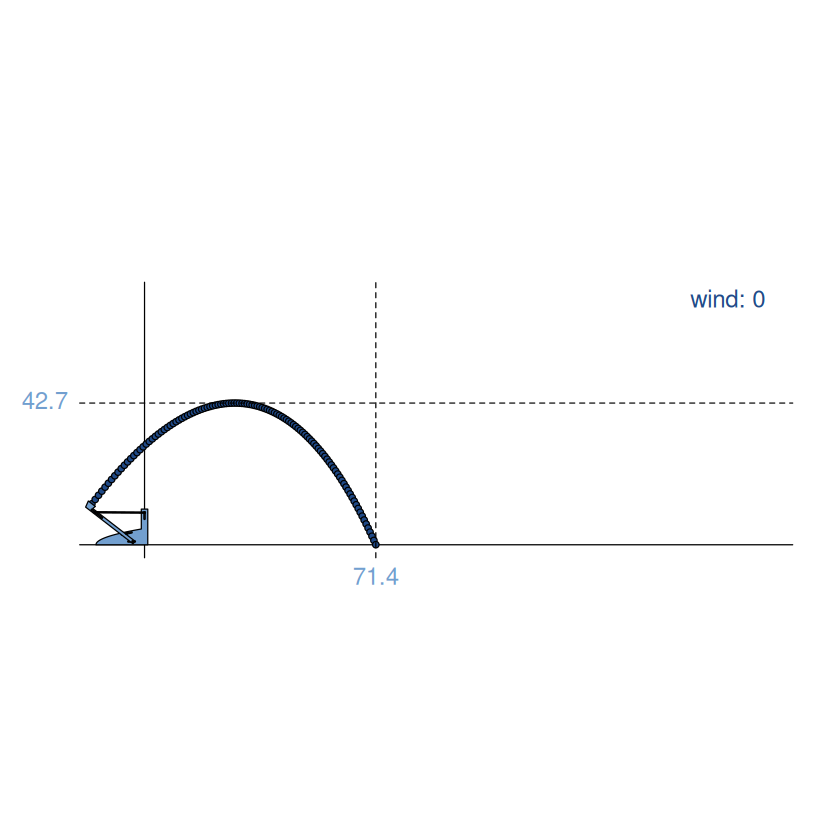

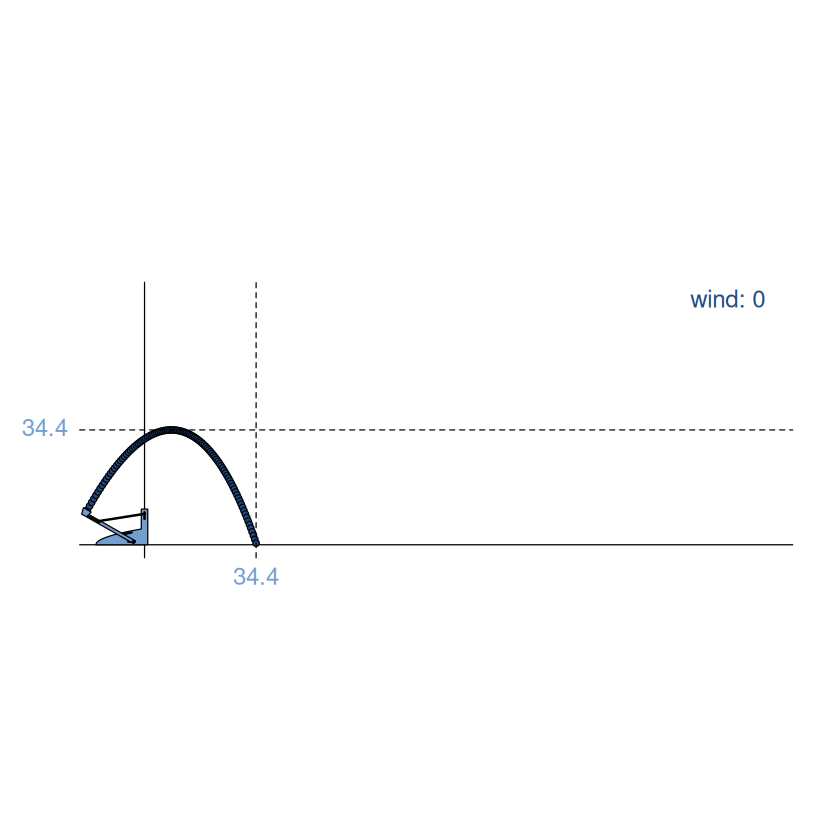

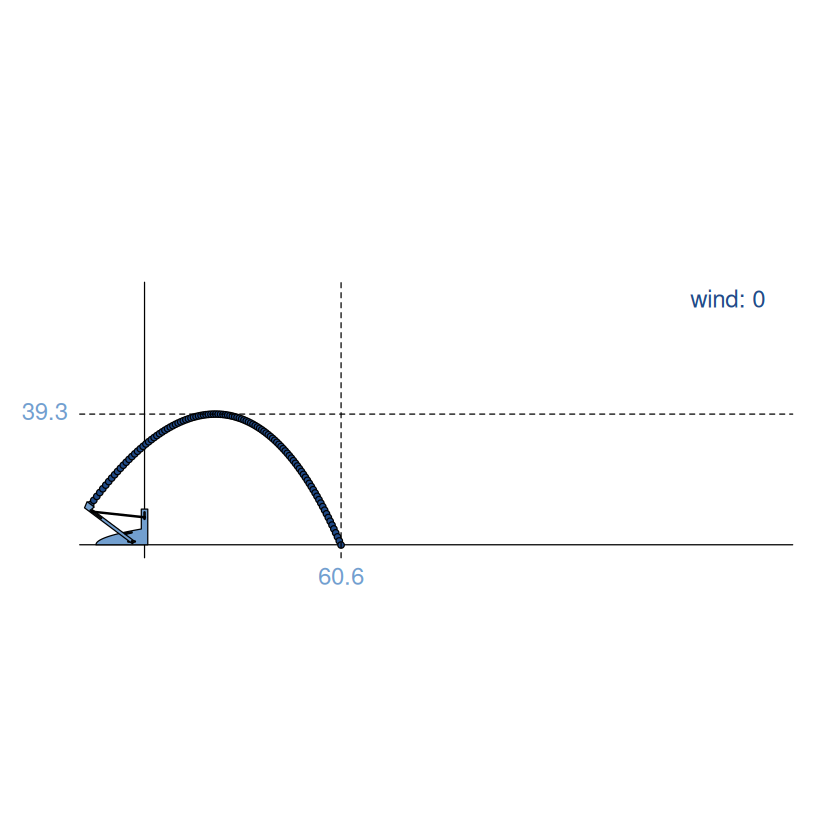

In [3]:
library(DiceDesign)
set.seed(0)
ninit <- 16
d <- 4
X0 <- lhsDesign(n = ninit, dimension = d)$design
Xopt <- maximinESE_LHS(X0, it = 10)
## you may be interested in the convergence
#plot(Xopt$critValues,type="l")
X <- Xopt$design
colnames(X) <- c("axis", "arm", "spring1", "spring2")
pairs(X)
## compute the output values
Y <- apply(X, 1, runExperiment, windFactor = 0)[1, ]


Question : Observe that the design of experiments is "space-filling". <br> Why did we chose that kind of designs? What is the current maximum? Is it far from the maximum value found by-hand?

In [4]:
max(Y)

[1] 167.4379

## Descriptive statistics
*Question : Can you see a simple input-output relation? What can you say about the area corresponding to the maximum value?*

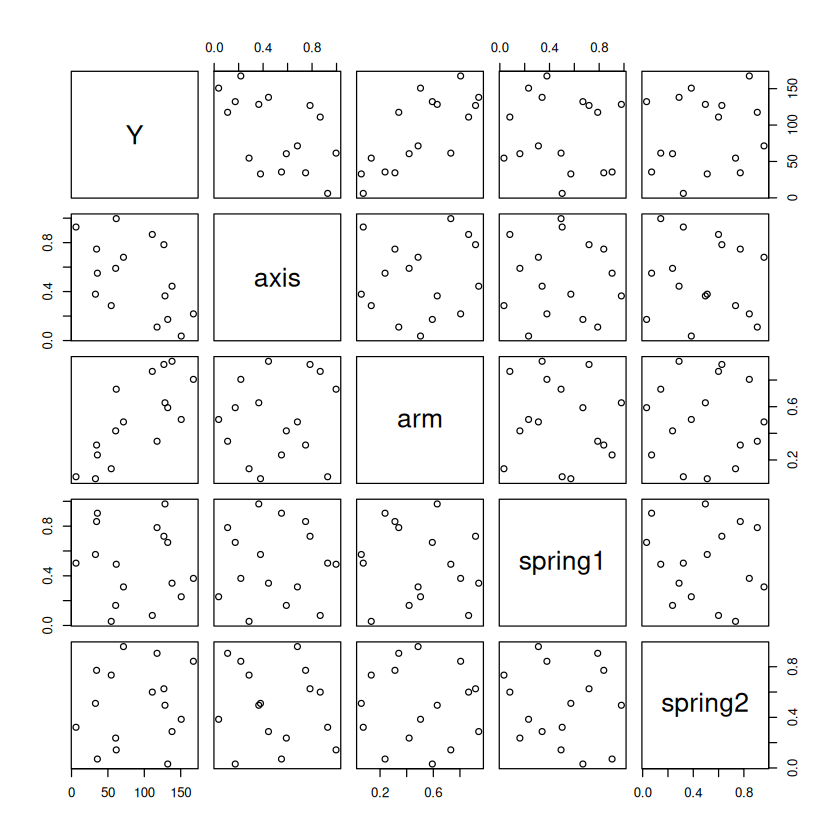

In [5]:
pairs(cbind(Y, X))

## Regression metamodel
<br> *Question : Try the linear models below. If you replace the simulator by one of this model, what would be the optimum? Is it far from your previous guess?*


Call:
lm(formula = Y ~ ., data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.361  -7.987  -1.178   5.582  21.216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   63.102     10.980   5.747 0.000129 ***
axis        -101.532      9.774 -10.387 5.05e-07 ***
arm          138.750      9.987  13.893 2.55e-08 ***
spring1        2.389      9.960   0.240 0.814885    
spring2       14.110      9.933   1.421 0.183162    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.34 on 11 degrees of freedom
Multiple R-squared:  0.9622,	Adjusted R-squared:  0.9485 
F-statistic: 70.02 on 4 and 11 DF,  p-value: 9.428e-08


[1] 86.3381


Call:
lm(formula = Y ~ . + I(axis^2) + I(arm^2) + I(spring1^2) + I(spring2^2), 
    data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.904  -5.922   1.747   4.238  13.621 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)    66.436     24.392   2.724  0.02961 * 
axis         -184.085     41.407  -4.446  0.00299 **
arm           151.452     49.411   3.065  0.01819 * 
spring1         4.139     42.882   0.097  0.92582   
spring2        58.214     46.009   1.265  0.24626   
I(axis^2)      79.829     38.695   2.063  0.07801 . 
I(arm^2)      -14.530     49.407  -0.294  0.77722   
I(spring1^2)    2.462     42.167   0.058  0.95507   
I(spring2^2)  -42.390     45.294  -0.936  0.38049   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.16 on 7 degrees of freedom
Multiple R-squared:  0.9807,	Adjusted R-squared:  0.9586 
F-statistic: 44.45 on 8 and 7 DF,  p-value: 2.562e-05


Start:  AIC=85.58
Y ~ axis + arm + spring1 + spring2

          Df Sum of Sq     RSS     AIC
- spring1  1       7.4  1422.0  82.886
- spring2  1     259.5  1674.1  85.498
<none>                  1414.6  85.575
- axis     1   13875.9 15290.5 120.889
- arm      1   24821.5 26236.2 129.527

Step:  AIC=82.89
Y ~ axis + arm + spring2

          Df Sum of Sq   RSS     AIC
- spring2  1       253  1675  82.734
<none>                  1422  82.886
- axis     1     13898 15320 118.147
- arm      1     25014 26436 126.876

Step:  AIC=82.73
Y ~ axis + arm

       Df Sum of Sq   RSS     AIC
<none>               1675  82.734
- axis  1     14547 16222 116.289
- arm   1     24970 26645 124.230



Call:
lm(formula = Y ~ axis + arm, data = myData)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6092  -8.5718  -0.9308   8.4464  19.3086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   72.323      7.217   10.02 1.76e-07 ***
axis        -103.203      9.713  -10.62 8.86e-08 ***
arm          138.369      9.940   13.92 3.45e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.35 on 13 degrees of freedom
Multiple R-squared:  0.9553,	Adjusted R-squared:  0.9484 
F-statistic: 138.8 on 2 and 13 DF,  p-value: 1.698e-09


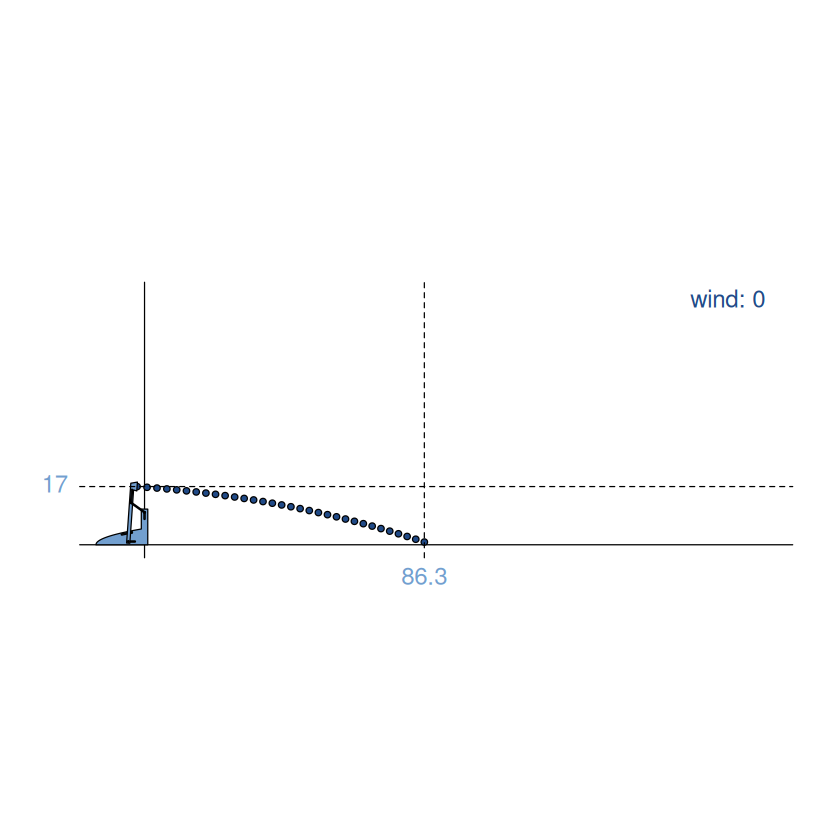

In [6]:
myData <- data.frame(X, Y = Y)
mReg <- lm(Y ~ ., data = myData)
summary(mReg)
runExperiment(c(0, 1, 1, 1), windFactor = 0)[1]
mReg2 <- lm(Y~ . + I(axis^2) + I (arm^2) + I (spring1^2) + I(spring2^2), data = myData)
summary(mReg2)
mStep <- step(object = mReg, scope = mReg2, direction = "both", k = log(length(Y)))
summary(mStep)

## Bayesian optimization
Now, let us try the EGO method (Bayesian optimization)
<br> *Question : Recall its main principles.*


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -71.60964 -74.01433 -76.35253 -78.3696 -78.40675 



Warning message:
“executing %dopar% sequentially: no parallel backend registered”


N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        71.61  |proj g|=       1.2324
At iterate     1  f =       71.285  |proj g|=       0.80958
At iterate     2  f =       70.342  |proj g|=       0.85602
At iterate     3  f =        69.97  |proj g|=       0.44689
At iterate     4  f =       69.934  |proj g|=      0.096081
At iterate     5  f =       69.933  |proj g|=      0.040871
At iterate     6  f =       69.933  |proj g|=     0.0021148
At iterate     7  f =       69.933  |proj g|=    2.5813e-05
At iterate     8  f =       69.933  |proj g|=    2.7882e-07

iterations 8
function evaluations 10
segments explored during Cauchy searches 13
BFGS updates skipped 0
active bounds at final generalized Cauchy point 2
norm of the final projected gradient 2.78823e-07
final function value 69.9333

F = 69.9333
final  value 69.933294 
converged
N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At

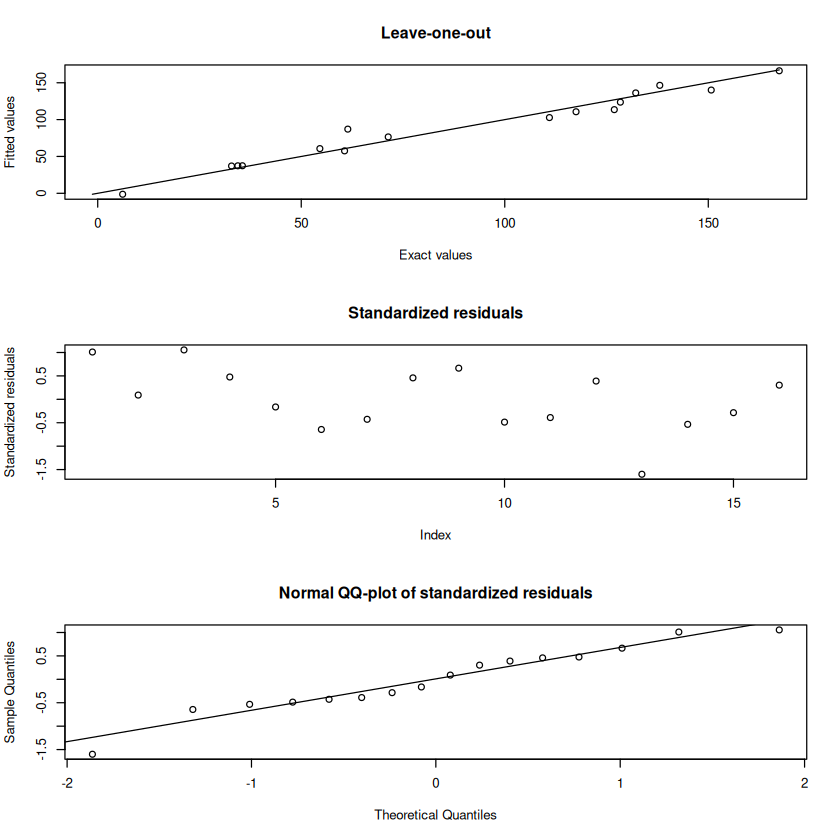

In [7]:
library(DiceKriging)
mGP0 <- km(~ 1, design = X, response = Y, multistart = 5)
print(mGP0)   # display model
plot(mGP0)    # visual model validation

*Questions: What is the role of the argument 'multistart'? What can you say about the performance and the validity of this first model?*

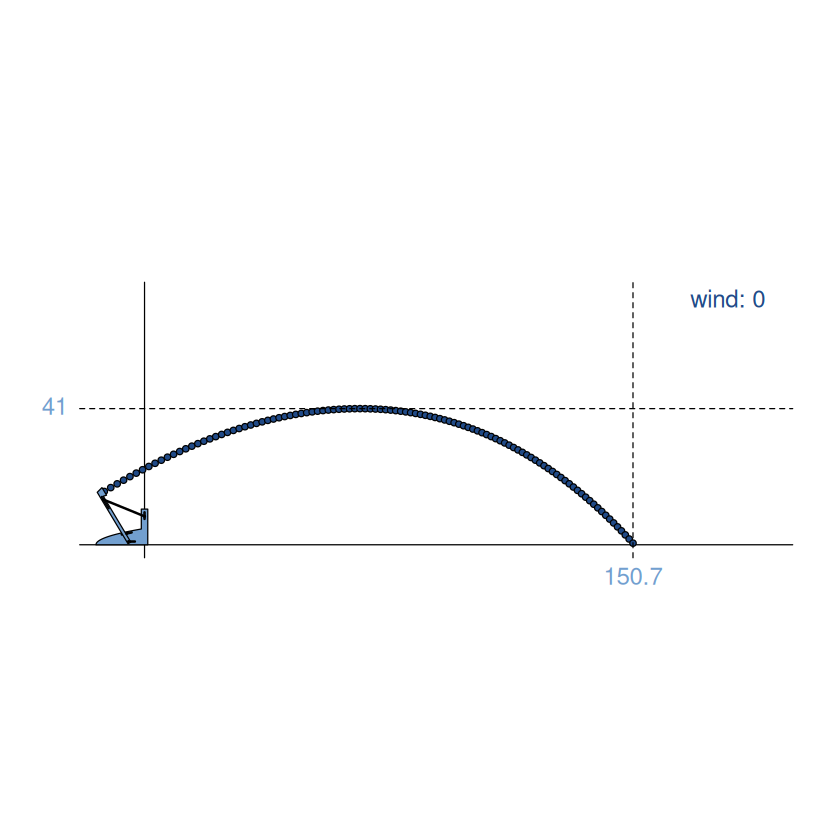

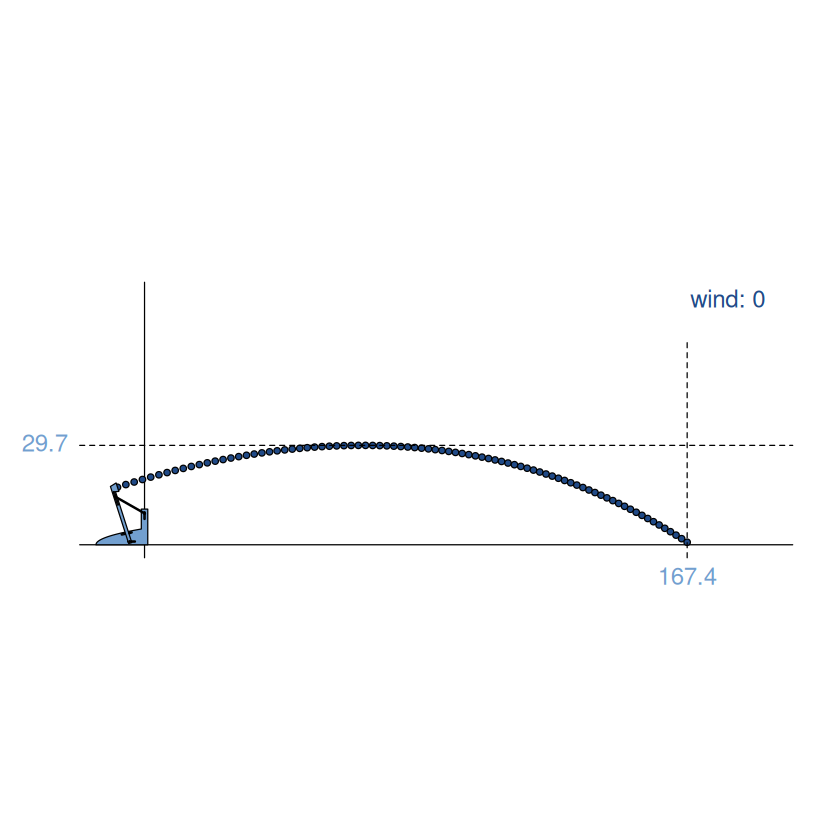

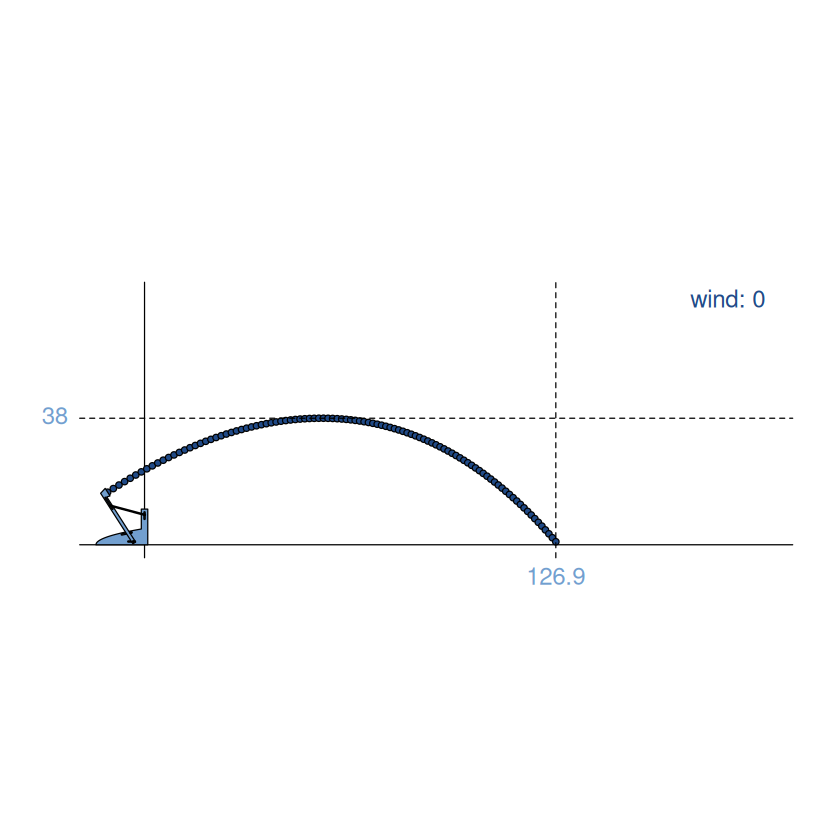

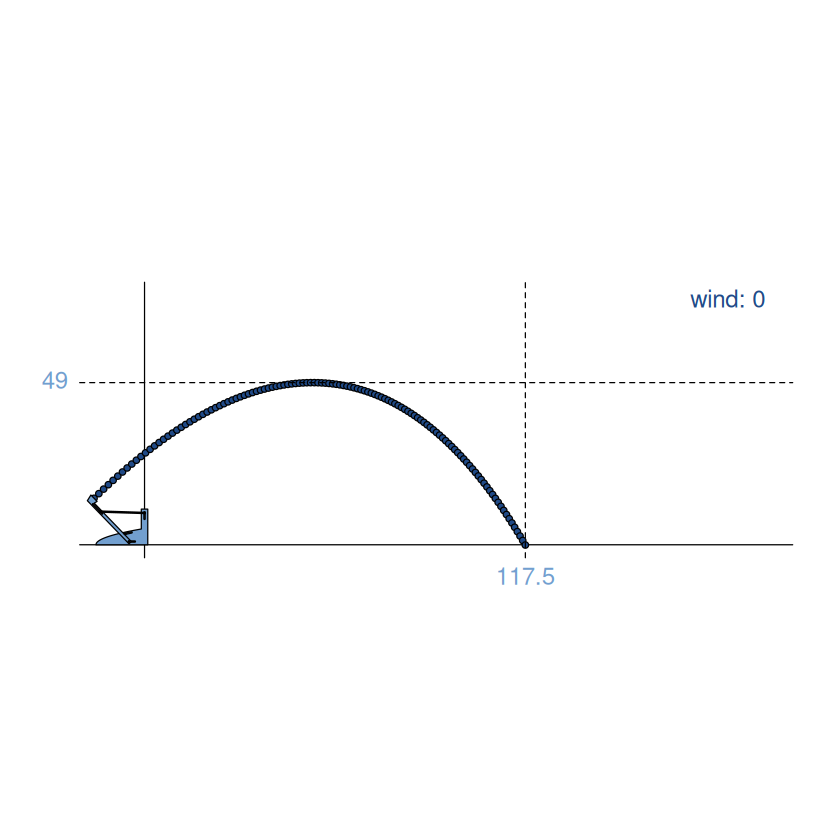

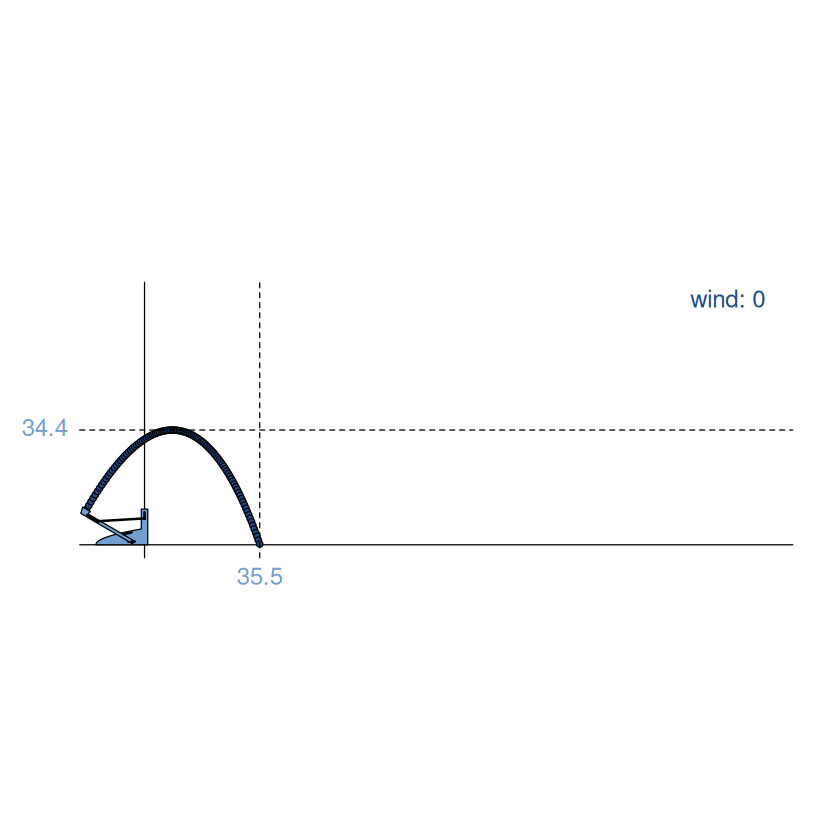

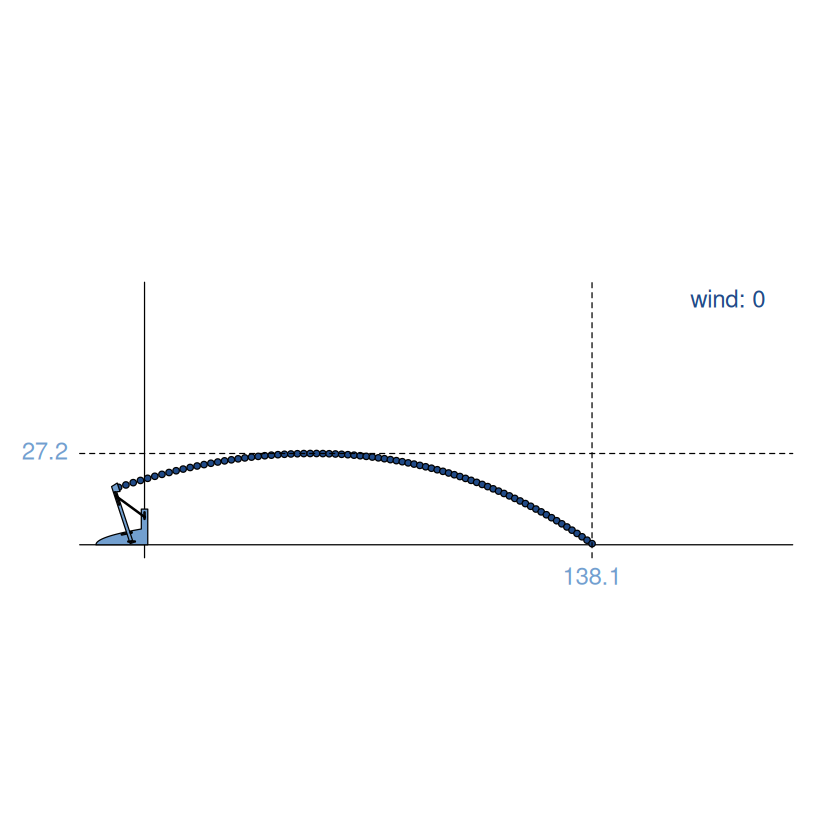

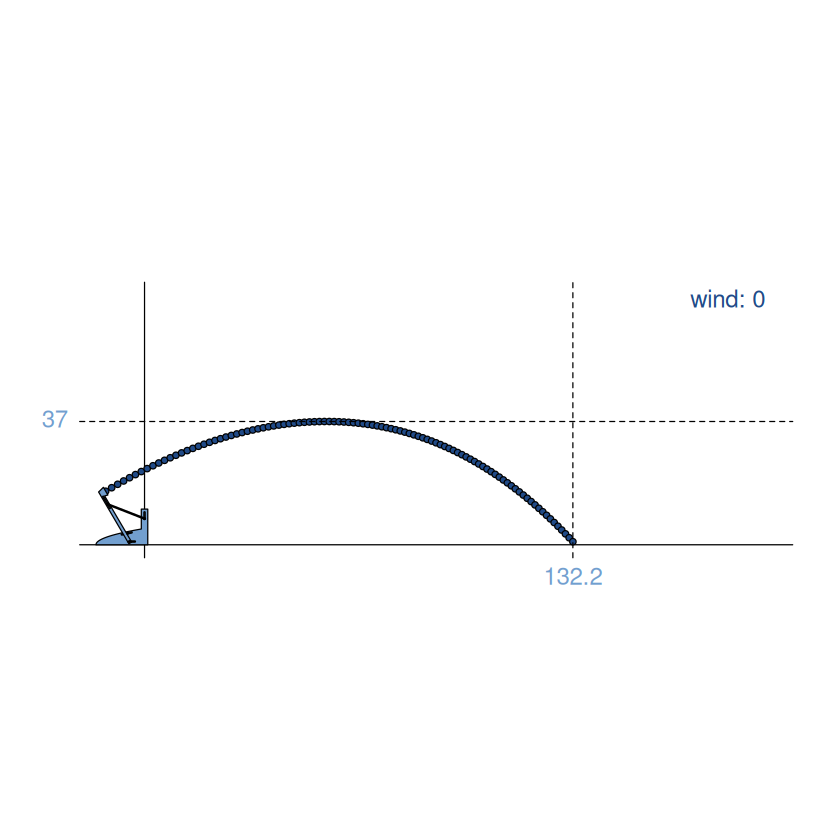

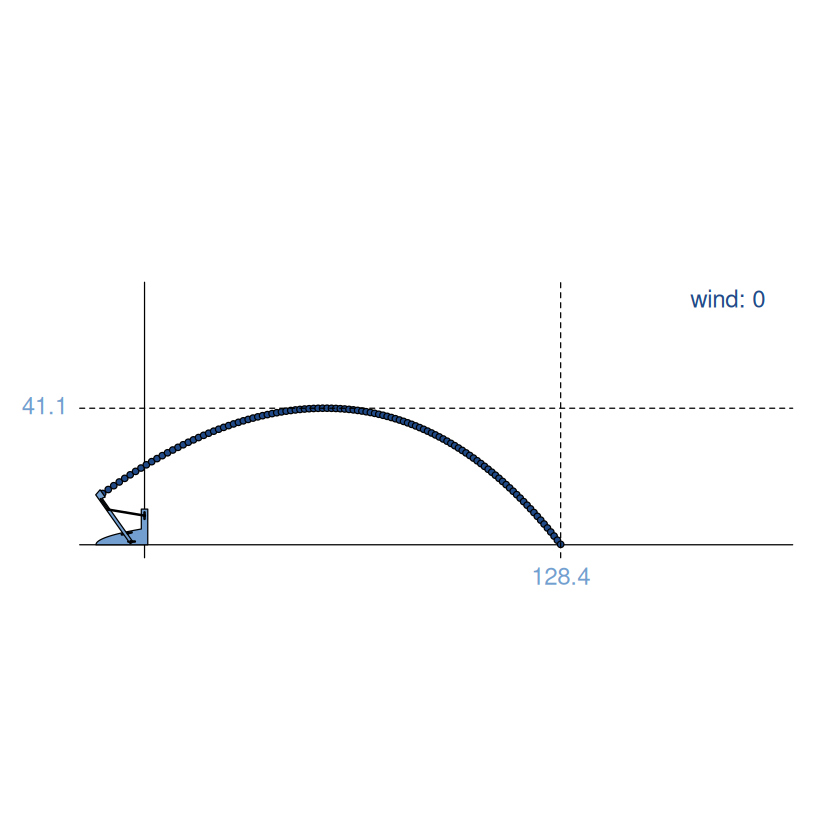

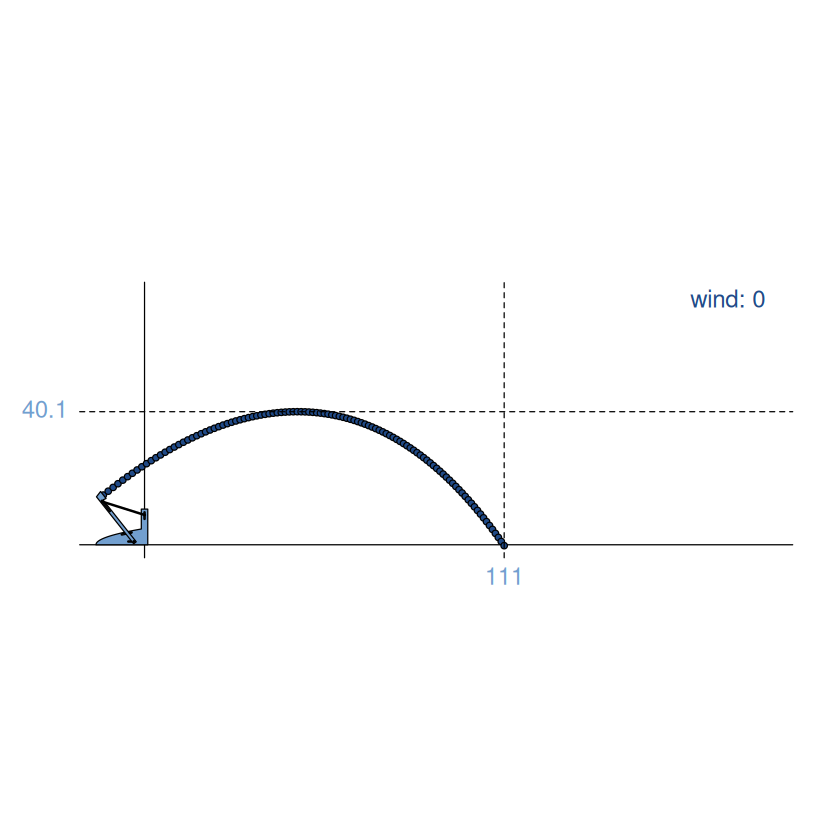

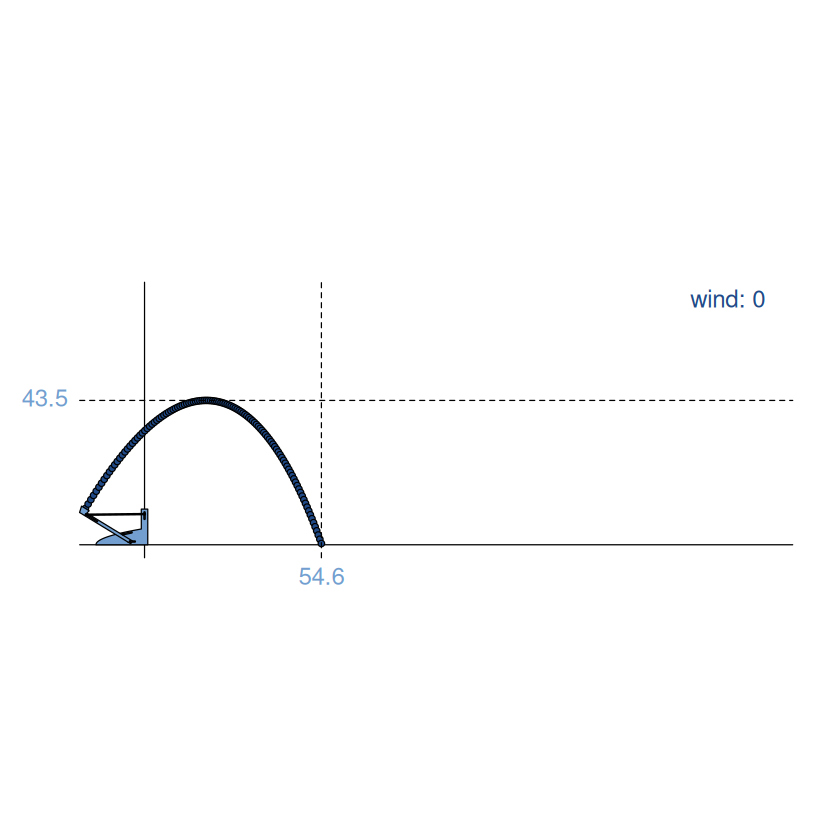

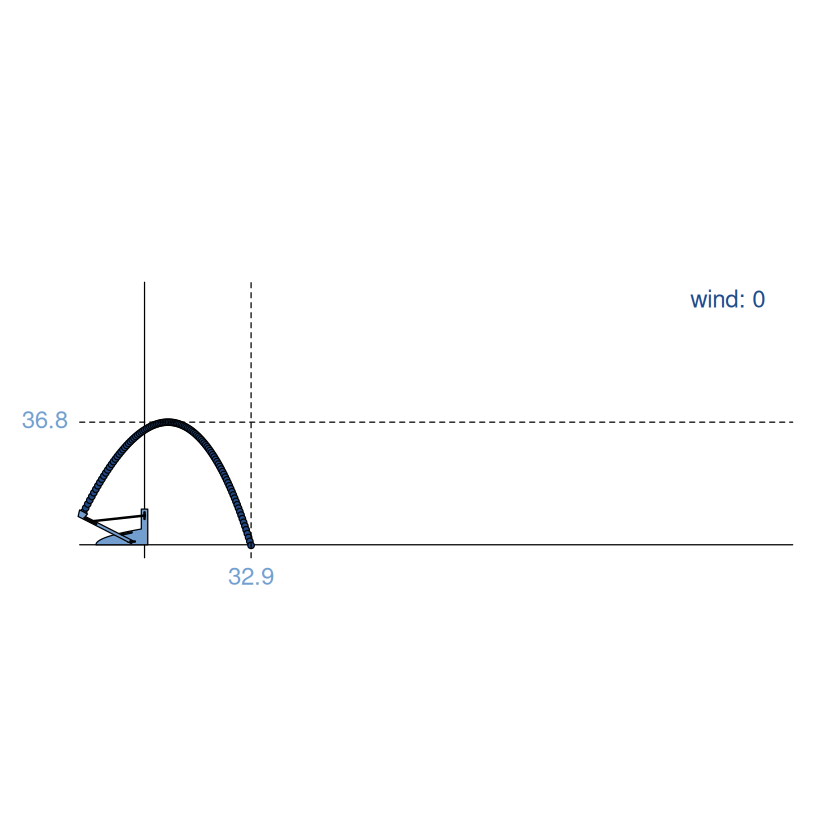

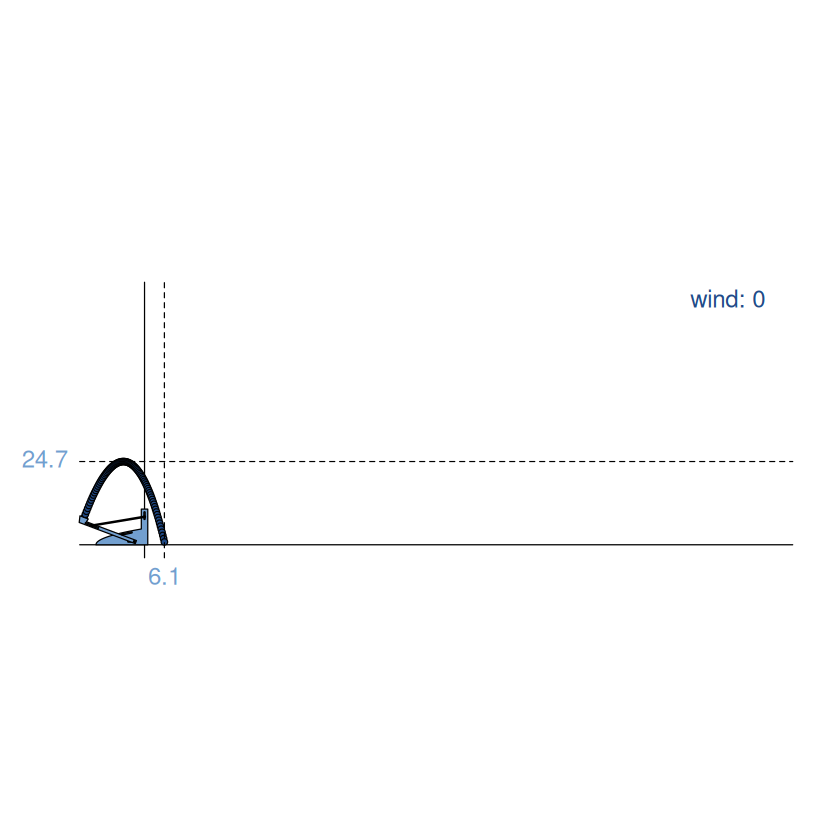

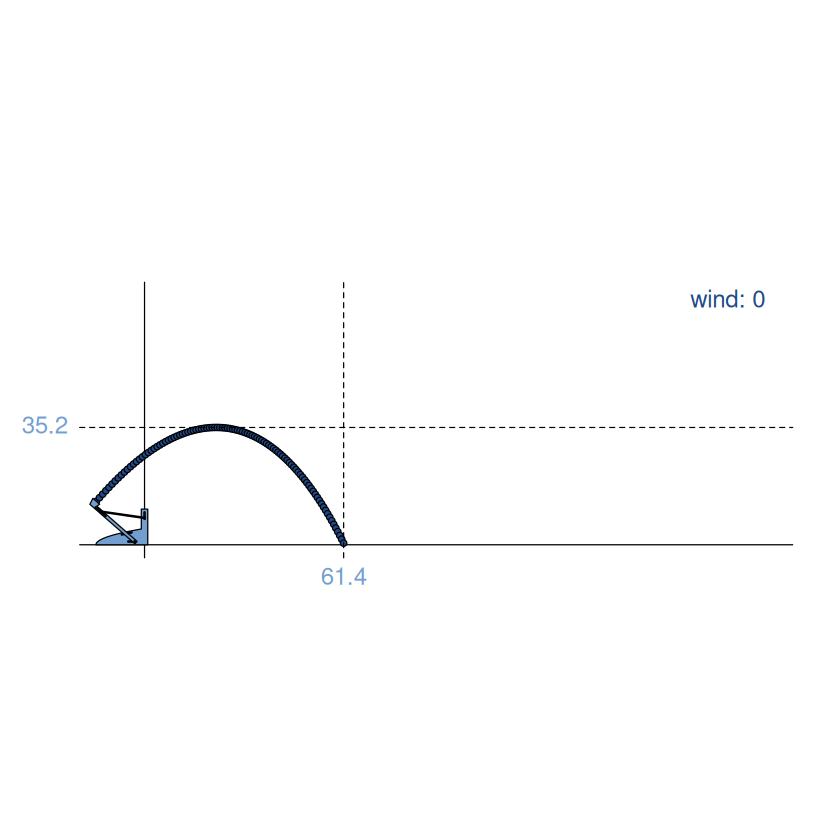

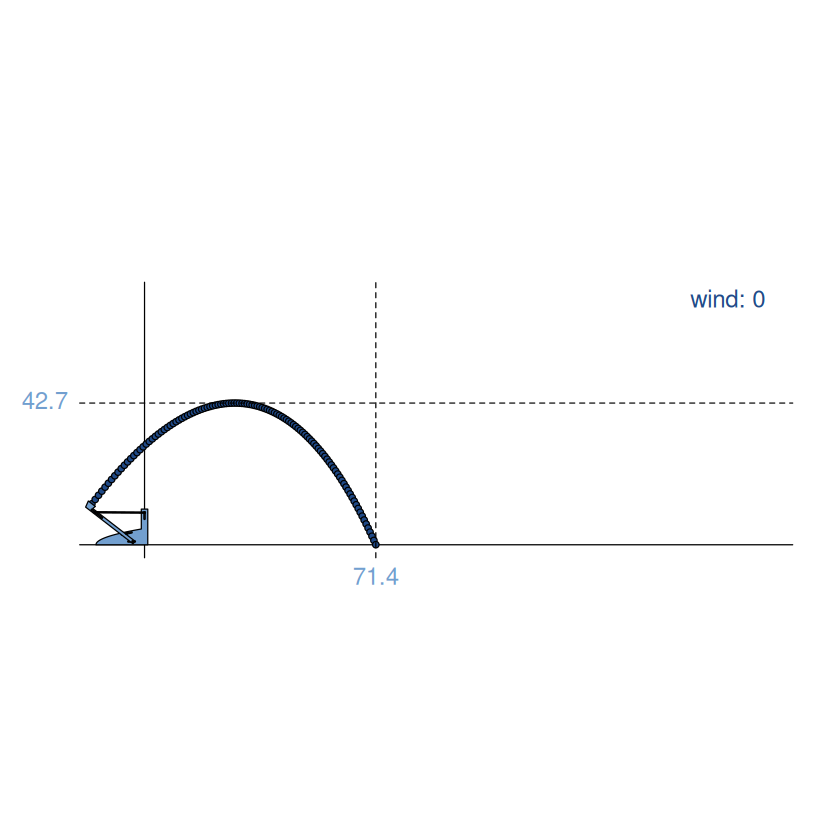

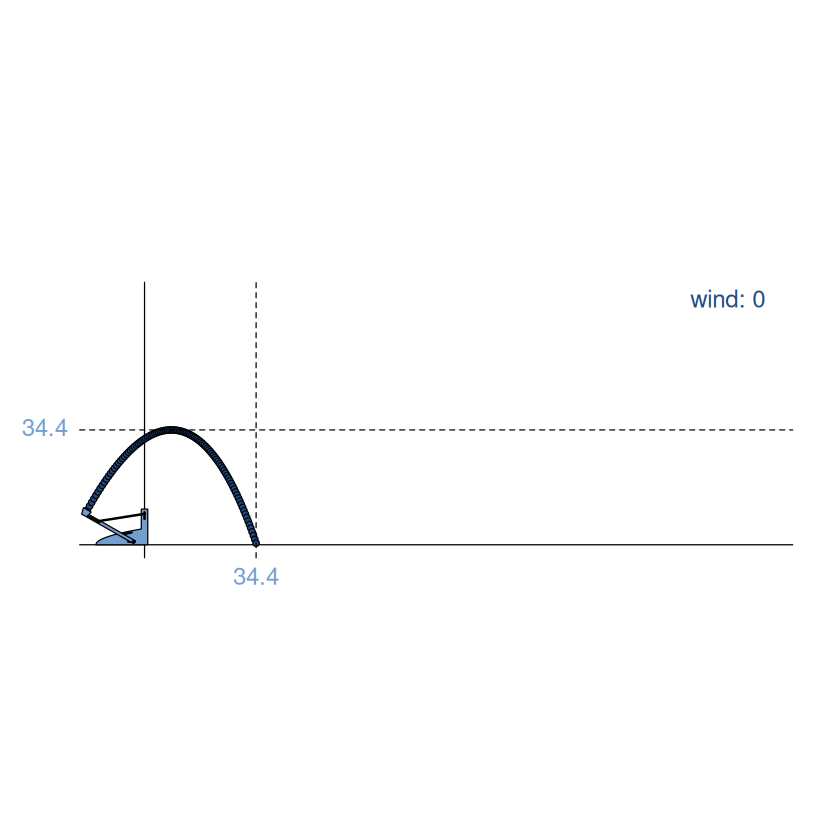


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -75.86134 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       75.861  |proj g|=       1.6684
At iterate     1  f =       71.034  |proj g|=        1.1975
At iterate     2  f =       70.183  |proj g|=        1.2002
At iterate     3  f =       70.143  |proj g|=         1.102
At iterate     4  f =       69.949  |proj g|=       0.57212
At iterate     5  f =       69.934  |proj g|=       0.10933
At iterate     6  f =       69.933  |proj g|=      0.013455
At iterate     7  f =       69.933  |proj g|=     0.0020074
At iterate     8  f =       69.933  |proj g|=    1

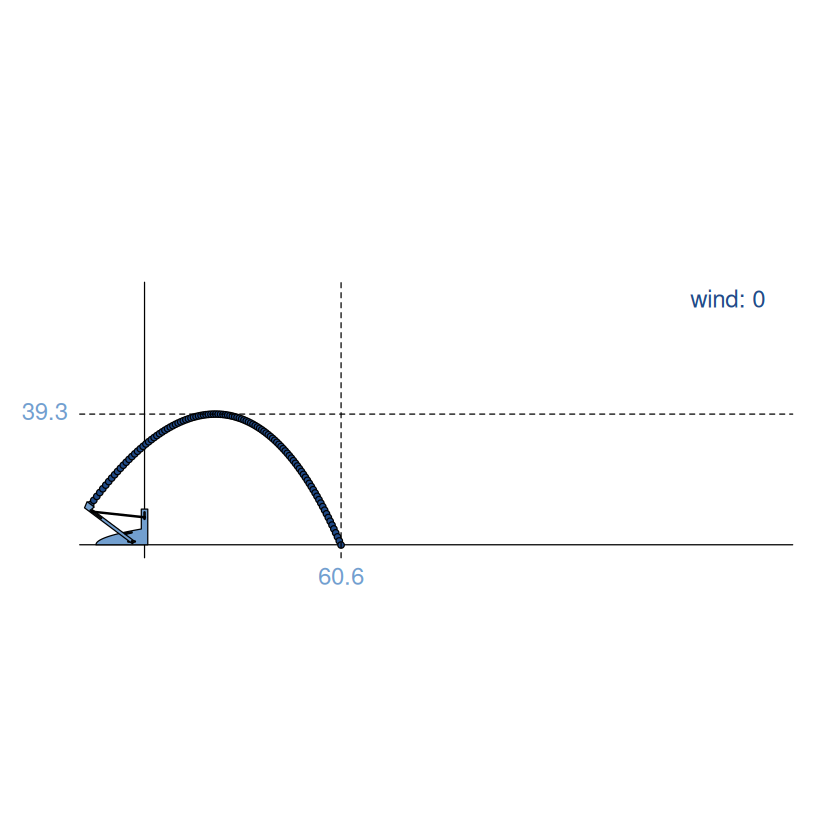

Expected improvement was: 14.56 
Actual improvement is: -32.38 
   (>0 means the new point is better, <0 means it is worse)

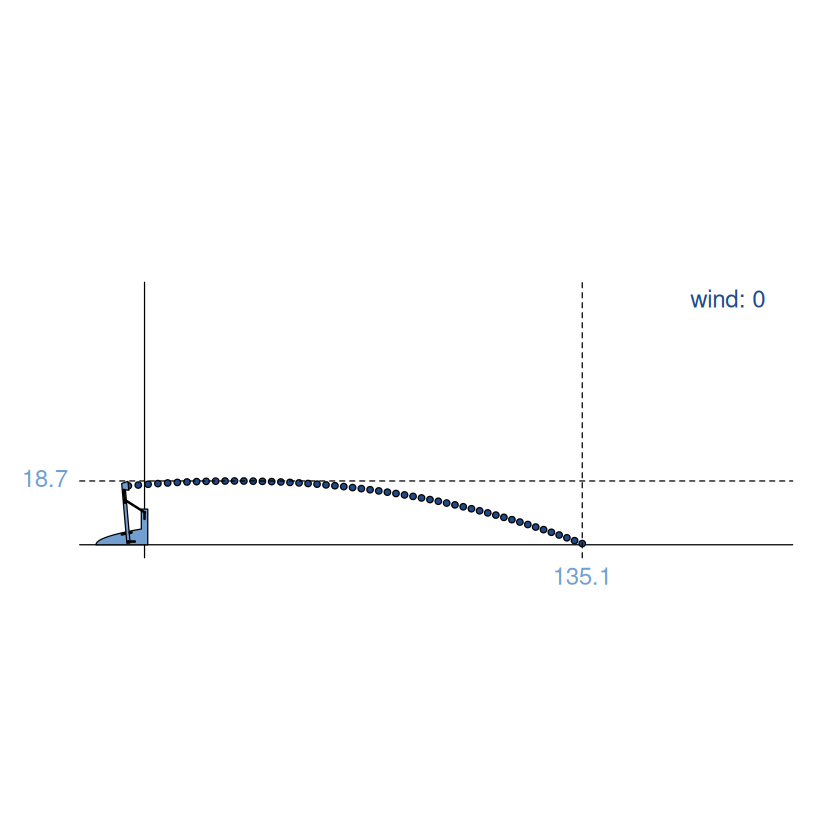

In [8]:
library(DiceOptim)

## We first transform the problem to a minimization one
runExperimentFun <- function(x) {
    - runExperiment(x, wind = 0)[1]
}
Y <- apply(X, 1, runExperimentFun)
mGP0 <- km(~ 1, design = X, response = Y)

## Step 1 ##
oEGO <- max_EI(model = mGP0, lower = rep(0, d), upper = rep(1, d))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(Y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means it is worse)")


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -81.85312 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       81.853  |proj g|=       1.1566
At iterate     1  f =        80.12  |proj g|=       0.98835
At iterate     2  f =       77.191  |proj g|=        1.4692
At iterate     3  f =        76.53  |proj g|=        1.3247
At iterate     4  f =       76.449  |proj g|=        1.3635
At iterate     5  f =       76.275  |proj g|=       0.66599
At iterate     6  f =       76.208  |proj g|=       0.66544
At iterate     7  f =       76.187  |proj g|=       0.15685
At iterate     8  f =       76.178  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 6.437735e+00

Parameters at the Solution (parameter, gradient):

 X[ 1] :	1.583237e-01	G[ 1] :	1.293149e-06
 X[ 2] :	7.254241e-01	G[ 2] :	-1.153374e-05
 X[ 3] :	0.000000e+00	G[ 3] :	-4.926778e+00
 X[ 4] :	9.767530e-01	G[ 4] :	-2.150455e-05

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:46 2024
Total run time : 0 hours 0 minutes and 0 seconds
Expected improvement was: 6.44 
Actual improvement is: 12.04 
   (>0 means the new point is better, <0 means its worst)

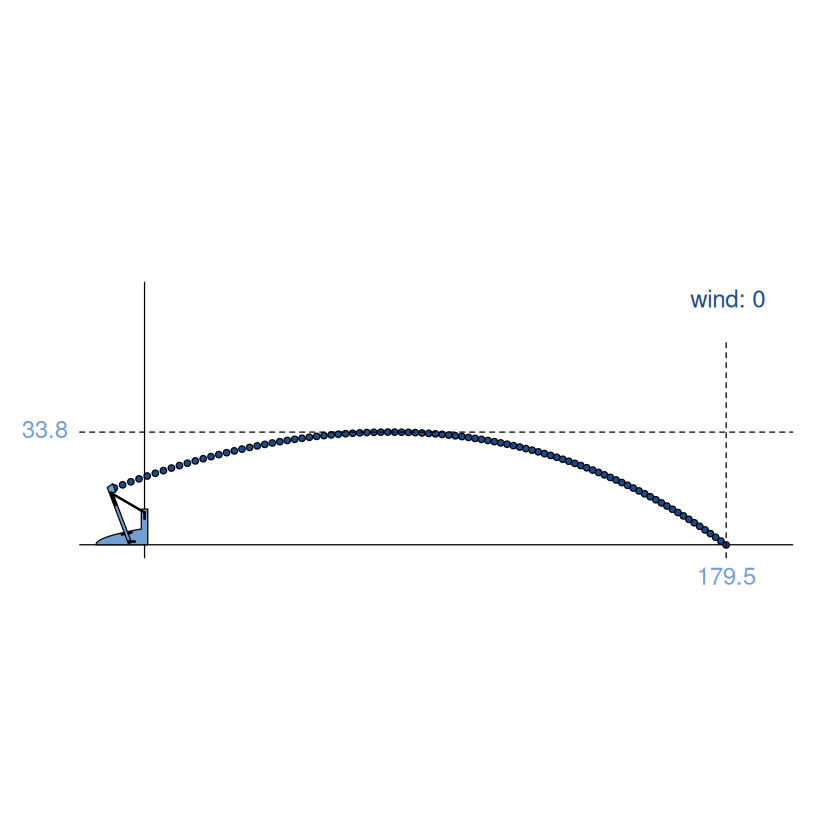

In [9]:
# Then we update the model
mGP1 <- update(mGP0, newX, newy)
# and maximize again the expected improvement: 
## Step 2 ##
oEGO <- max_EI(model = mGP1, lower = rep(0, d), upper = rep(1, d))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(mGP1@y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means its worst)")



Thu Sep 19 14:40:46 2024
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Uniform Mutation........ 	6
	(8) Heuristic Crossover............... 	6
	(9) Local-Minimum Crossover........... 	0

HARD Maximum Number of Generations: 12
Maximum Nonchanging Generations: 2
Population size       : 48
Convergence Tolerance: 1.000000e-21

Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Not Using Out of Bounds Individuals and Not Allowing Trespassing.


Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 6.437736e+00

Parameters at the Solution (parameter, gradient):

 X[ 1] :	1.583236e-01	G[ 1] :	2.749859e-06
 X[ 2] :	7.254240e-01	G[ 2] :	-1.328682e-06
 X[ 3] :	0.000000e+00	G[ 3] :	-4.926780e+00
 X[ 4] :	9.767519e-01	G[ 4] :	2.965704e-06

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:47 2024
Total run time : 0 hours 0 minutes and 0 seconds


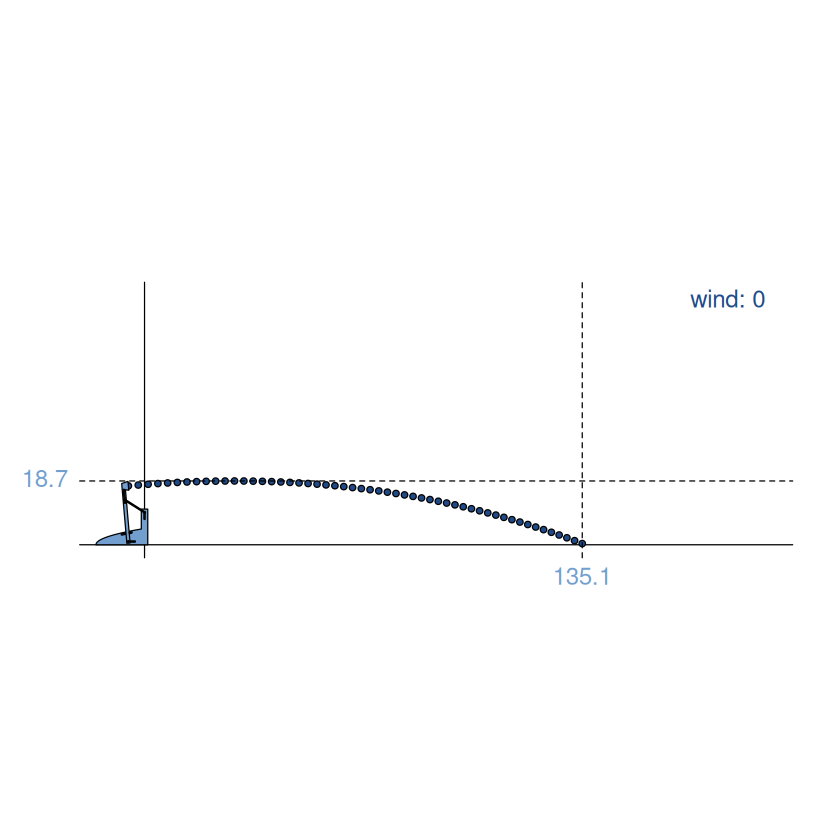


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -85.05768 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       85.058  |proj g|=       1.5339
At iterate     1  f =       81.355  |proj g|=       0.70614
At iterate     2  f =       81.033  |proj g|=       0.68106
At iterate     3  f =       80.385  |proj g|=       0.48101
At iterate     4  f =        80.11  |proj g|=       0.69445
At iterate     5  f =       79.749  |proj g|=       0.39396
At iterate     6  f =       79.634  |proj g|=       0.21229
At iterate     7  f =       79.634  |proj g|=      0.062362
At iterate     8  f =       79.634  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“BFGS hit on best individual produced Out of Boundary individual.”


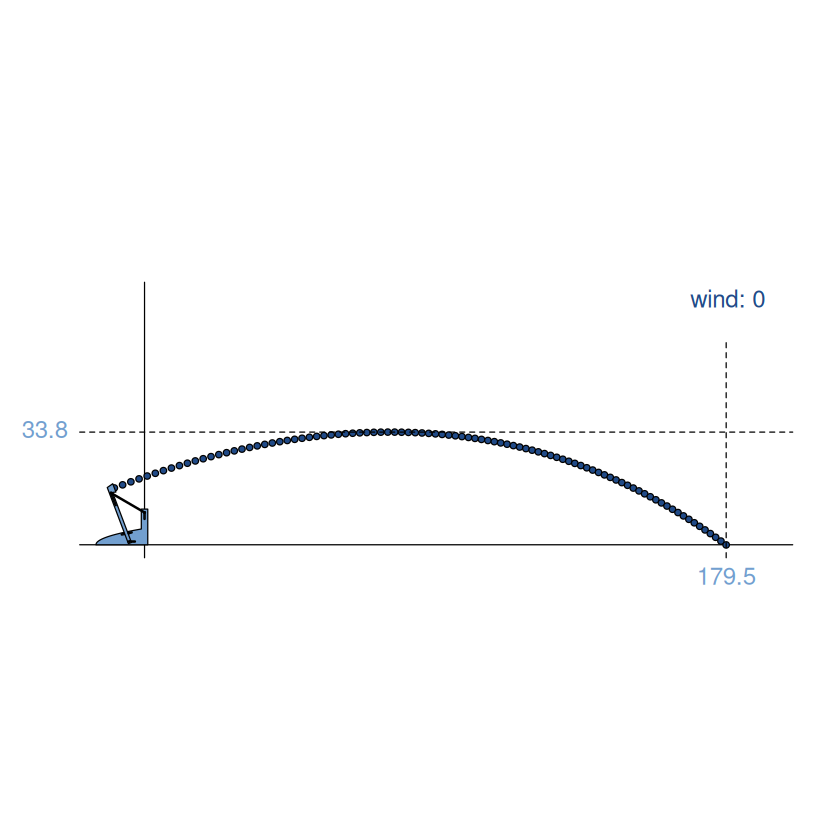

      3 	5.478306e-01
      4 	8.605367e-01

'wait.generations' limit reached.
No significant improvement in 2 generations.

Solution Fitness Value: 8.605367e-01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	0.000000e+00	G[ 1] :	-6.776704e+00
 X[ 2] :	6.610128e-01	G[ 2] :	1.971058e-07
 X[ 3] :	0.000000e+00	G[ 3] :	-3.570949e+00
 X[ 4] :	1.000000e+00	G[ 4] :	1.199226e+00

Solution Found Generation 4
Number of Generations Run 7

Thu Sep 19 14:40:47 2024
Total run time : 0 hours 0 minutes and 0 seconds


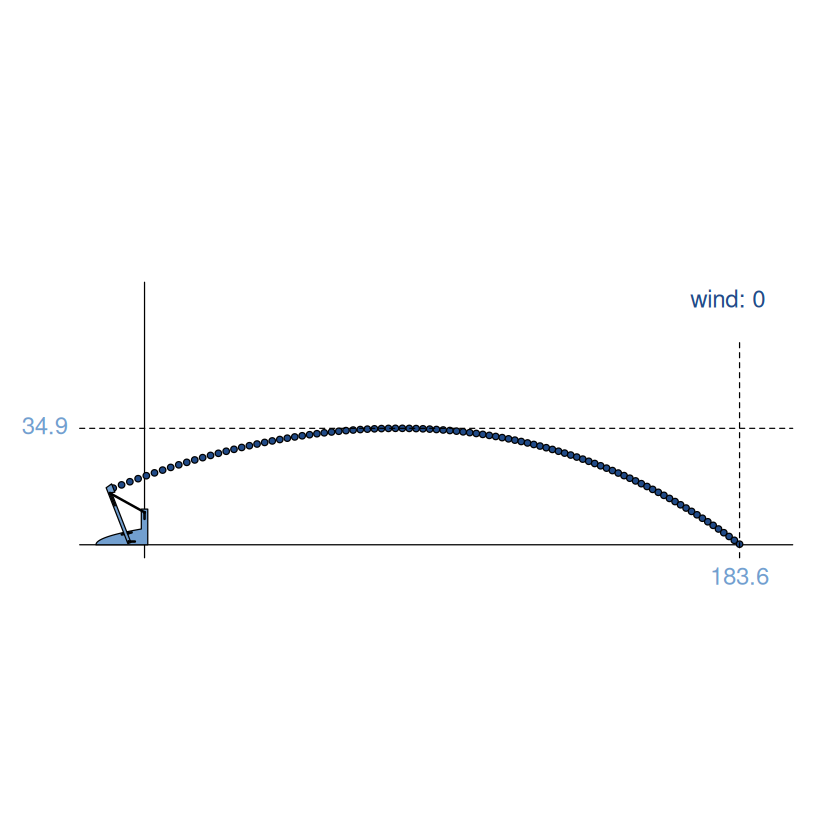


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -90.89445 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       90.894  |proj g|=       1.5636
At iterate     1  f =       87.358  |proj g|=       0.60107
At iterate     2  f =       86.351  |proj g|=        1.3658
At iterate     3  f =       86.106  |proj g|=       0.68887
At iterate     4  f =       85.154  |proj g|=       0.69903
At iterate     5  f =       85.011  |proj g|=       0.44885
At iterate     6  f =       85.007  |proj g|=       0.20341
At iterate     7  f =       85.006  |proj g|=     0.0062836
At iterate     8  f =       85.006  |proj g|=     

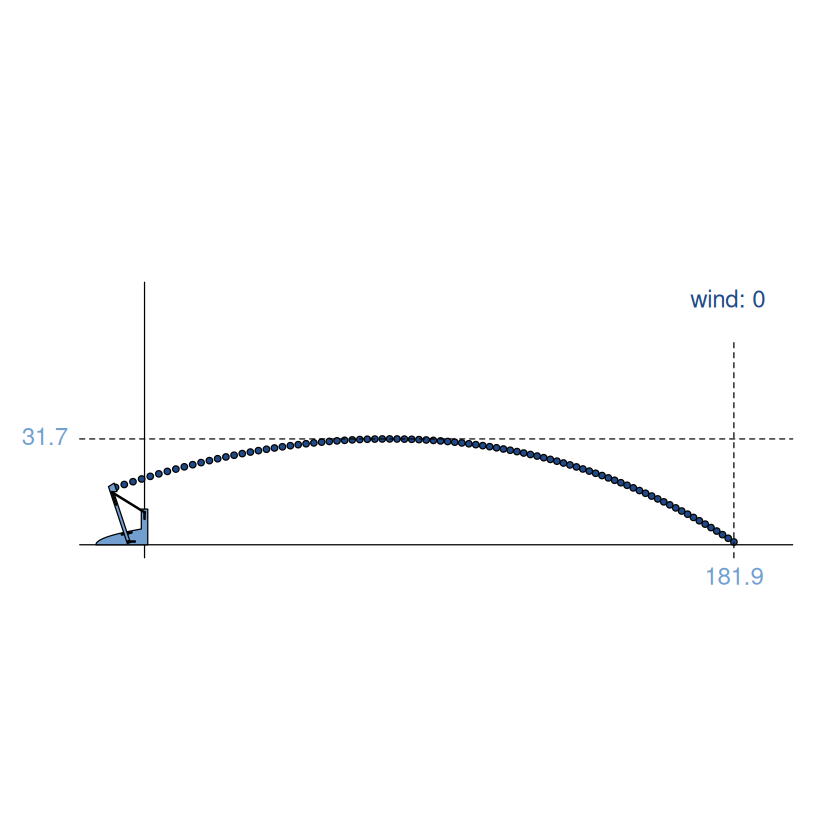


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -88.27287 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       88.273  |proj g|=          1.4
At iterate     1  f =       87.598  |proj g|=       0.68368
At iterate     2  f =       87.452  |proj g|=       0.47624
At iterate     3  f =       87.004  |proj g|=        1.3448
At iterate     4  f =       86.686  |proj g|=        1.3457
At iterate     5  f =       86.421  |proj g|=       0.63878
At iterate     6  f =         86.4  |proj g|=       0.11789
At iterate     7  f =       86.397  |proj g|=     0.0055225
At iterate     8  f =       86.397  |proj g|=    0

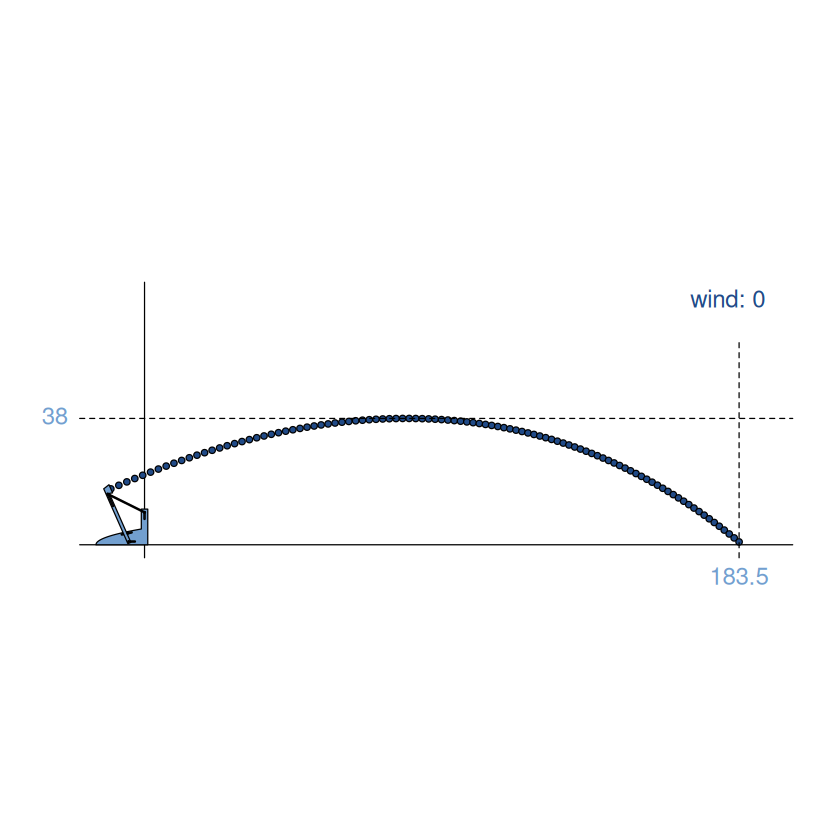


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -99.62807 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       99.628  |proj g|=       1.2613
At iterate     1  f =       98.334  |proj g|=        1.1458
At iterate     2  f =       92.782  |proj g|=        1.1066
At iterate     3  f =        92.25  |proj g|=        1.3147
At iterate     4  f =       89.298  |proj g|=         1.334
At iterate     5  f =       88.786  |proj g|=         1.306
At iterate     6  f =       88.257  |proj g|=       0.64309
At iterate     7  f =       88.198  |proj g|=        1.2025
At iterate     8  f =       88.057  |proj g|=     

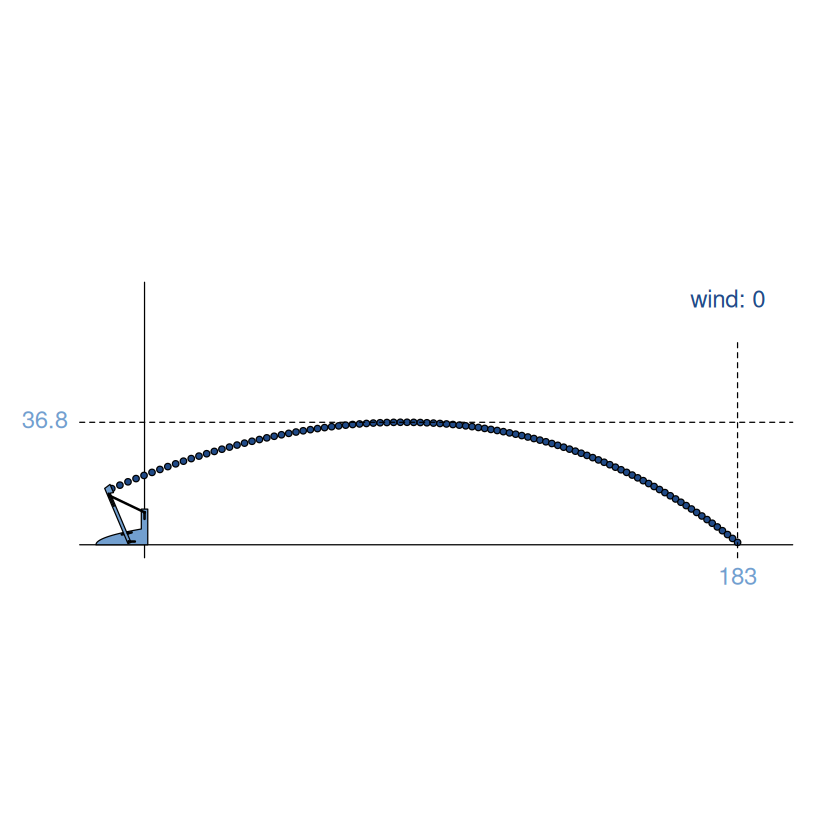


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -99.5551 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       99.555  |proj g|=       1.6212
At iterate     1  f =       93.789  |proj g|=        1.3264
At iterate     2  f =       93.384  |proj g|=        1.3014
At iterate     3  f =       92.617  |proj g|=       0.74503
At iterate     4  f =       92.079  |proj g|=         1.325
At iterate     5  f =       91.848  |proj g|=        1.0905
At iterate     6  f =       91.653  |proj g|=       0.72327
At iterate     7  f =       91.644  |proj g|=       0.46762
At iterate     8  f =       91.642  |proj g|=     0

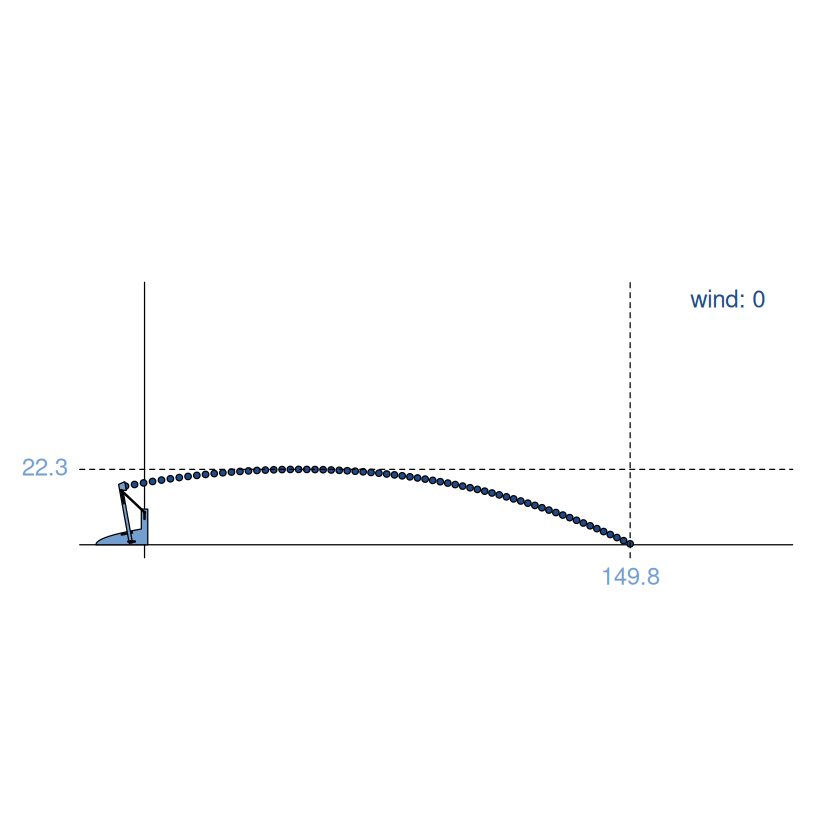


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -101.4584 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       101.46  |proj g|=       1.3007
At iterate     1  f =       100.04  |proj g|=       0.98206
At iterate     2  f =       97.873  |proj g|=       0.77555
At iterate     3  f =       97.345  |proj g|=        1.3539
At iterate     4  f =       96.769  |proj g|=        1.1384
At iterate     5  f =       96.418  |proj g|=       0.50781
At iterate     6  f =       96.328  |proj g|=       0.11807
At iterate     7  f =       96.328  |proj g|=     0.0068381
At iterate     8  f =       96.328  |proj g|=    6

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


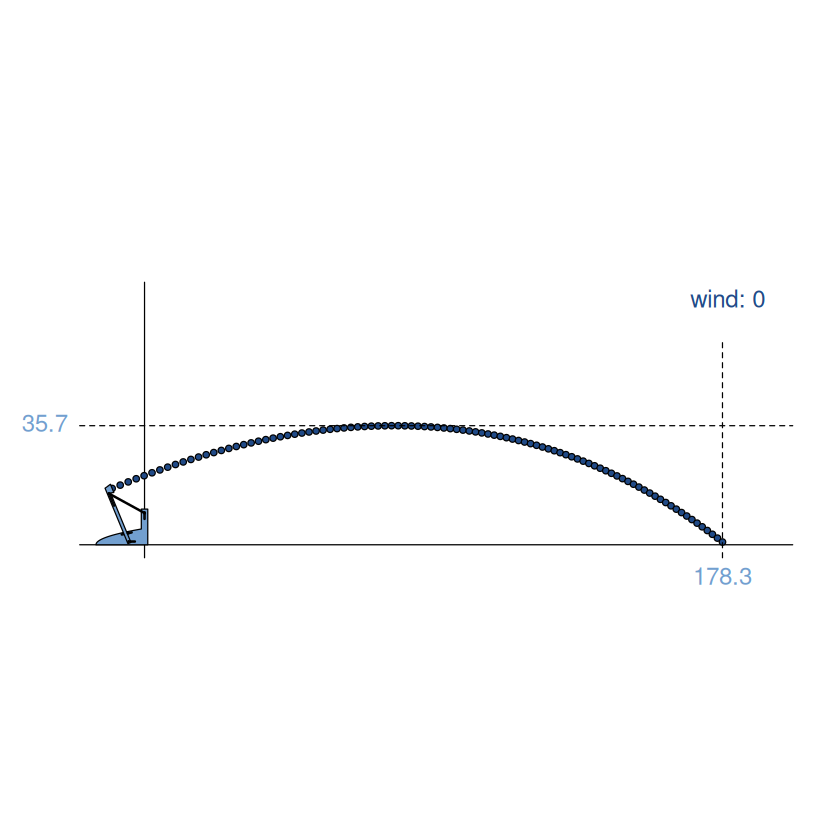


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 7.709890e-02

Parameters at the Solution (parameter, gradient):

 X[ 1] :	3.913979e-01	G[ 1] :	-3.770890e-08
 X[ 2] :	8.008537e-01	G[ 2] :	-2.552893e-08
 X[ 3] :	3.111688e-01	G[ 3] :	-5.797895e-08
 X[ 4] :	1.000000e+00	G[ 4] :	1.700082e+00

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:49 2024
Total run time : 0 hours 0 minutes and 0 seconds

optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -104.7136 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       104.71  |proj g|=       1.4019
At iterate     1  f =        1

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


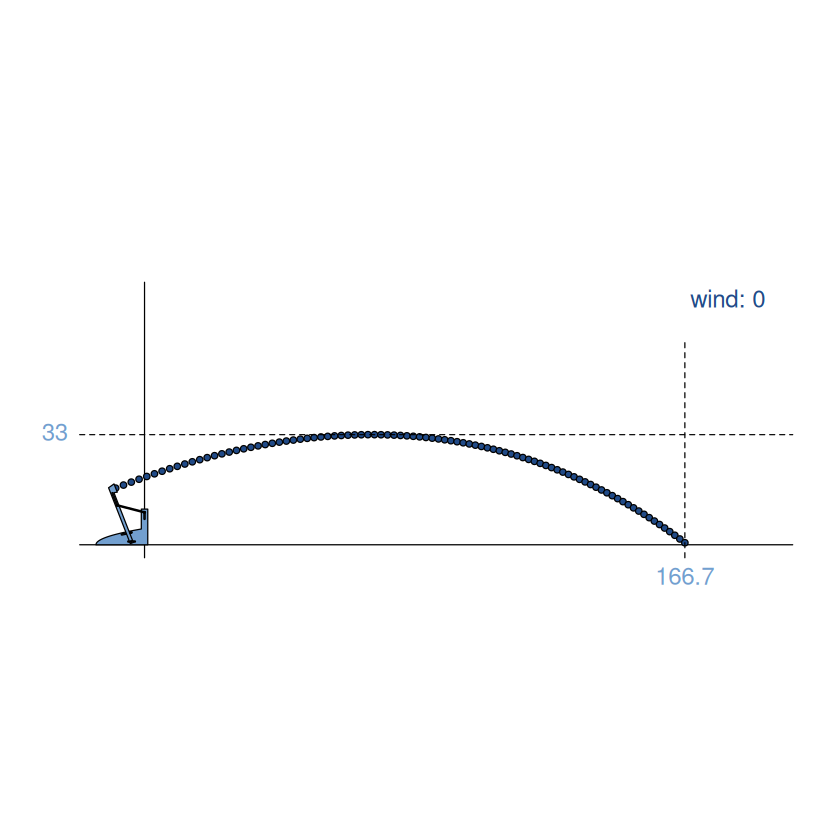


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.027898e-04

Parameters at the Solution (parameter, gradient):

 X[ 1] :	0.000000e+00	G[ 1] :	-1.032893e-03
 X[ 2] :	7.596899e-01	G[ 2] :	3.197679e-10
 X[ 3] :	0.000000e+00	G[ 3] :	-8.796179e-04
 X[ 4] :	0.000000e+00	G[ 4] :	-1.177447e-03

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:49 2024
Total run time : 0 hours 0 minutes and 0 seconds


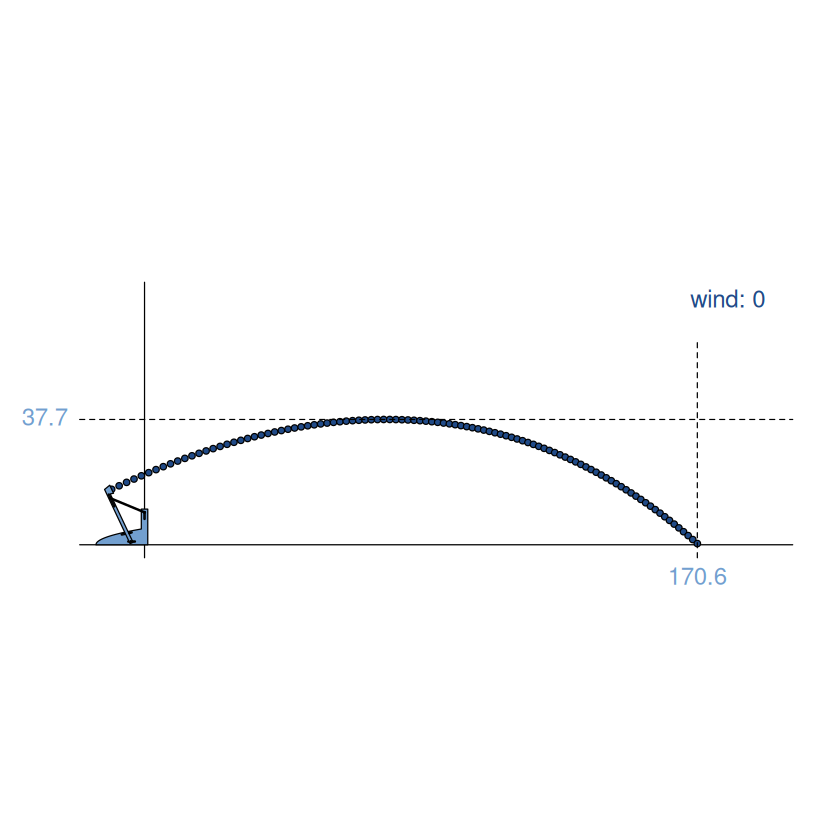


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -117.7219 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       117.72  |proj g|=       1.5393
At iterate     1  f =       111.22  |proj g|=       0.84852
At iterate     2  f =       110.74  |proj g|=       0.79155
At iterate     3  f =       107.62  |proj g|=        1.3412
At iterate     4  f =       107.17  |proj g|=        1.0759
At iterate     5  f =       107.09  |proj g|=       0.10381
At iterate     6  f =       107.09  |proj g|=      0.038967
At iterate     7  f =       107.09  |proj g|=      0.003755
At iterate     8  f =       107.09  |proj g|=    0

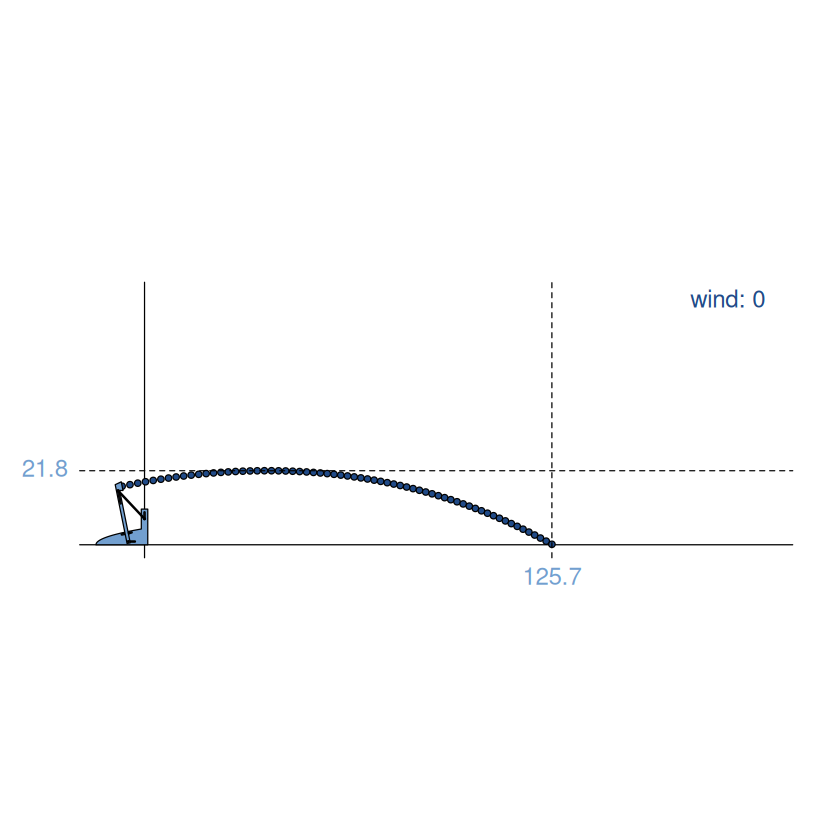


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -120.5323 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       120.53  |proj g|=       1.3867
At iterate     1  f =       116.32  |proj g|=        1.1908
At iterate     2  f =       111.88  |proj g|=       0.82548
At iterate     3  f =       108.74  |proj g|=        1.3399
At iterate     4  f =       106.83  |proj g|=        1.3735
At iterate     5  f =       106.49  |proj g|=        1.3222
At iterate     6  f =       106.28  |proj g|=        1.2948
At iterate     7  f =       106.24  |proj g|=      0.043325
At iterate     8  f =       106.24  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


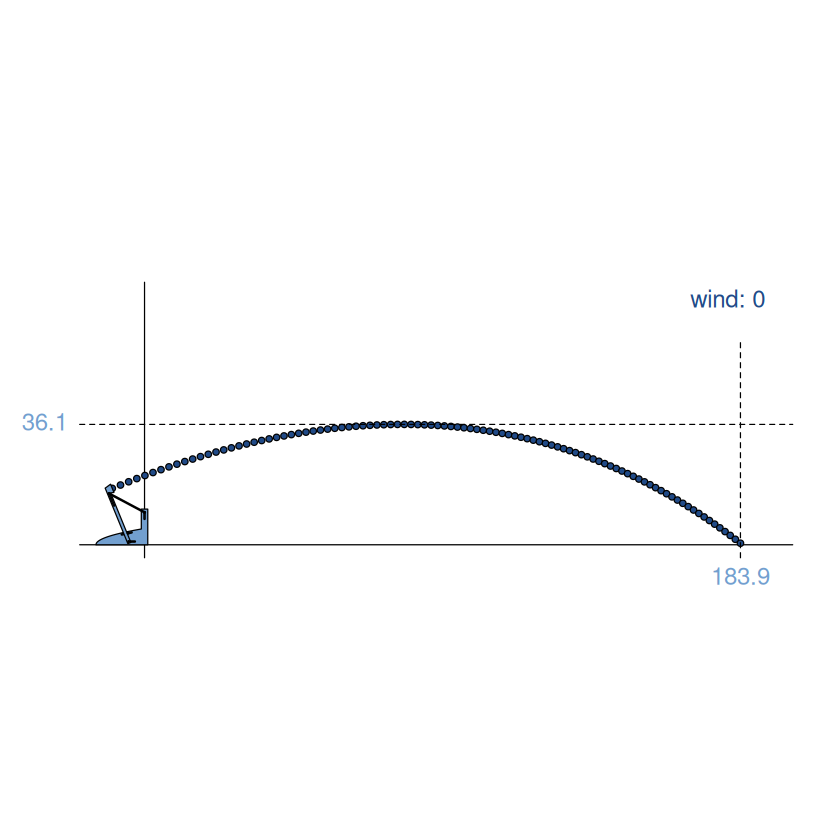


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 9.413259e-07

Parameters at the Solution (parameter, gradient):

 X[ 1] :	5.557925e-01	G[ 1] :	-2.727228e-06
 X[ 2] :	8.986240e-01	G[ 2] :	5.744111e-06
 X[ 3] :	0.000000e+00	G[ 3] :	-1.174716e-05
 X[ 4] :	1.000000e+00	G[ 4] :	3.654734e-05

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:50 2024
Total run time : 0 hours 0 minutes and 1 seconds


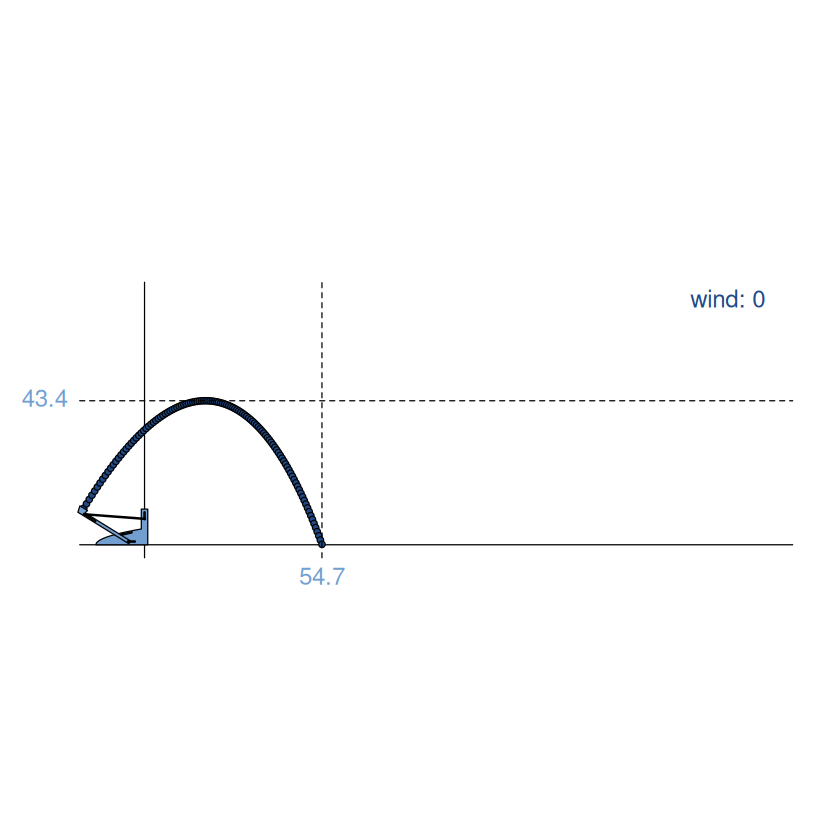


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -117.4579 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       117.46  |proj g|=       1.4543
At iterate     1  f =        116.5  |proj g|=        1.3575
At iterate     2  f =       116.21  |proj g|=       0.41826
At iterate     3  f =       115.73  |proj g|=        1.1844
At iterate     4  f =       115.33  |proj g|=       0.65192
At iterate     5  f =       115.13  |proj g|=        1.3706
At iterate     6  f =       114.96  |proj g|=        1.3319
At iterate     7  f =       114.93  |proj g|=        0.4181
At iterate     8  f =       114.93  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


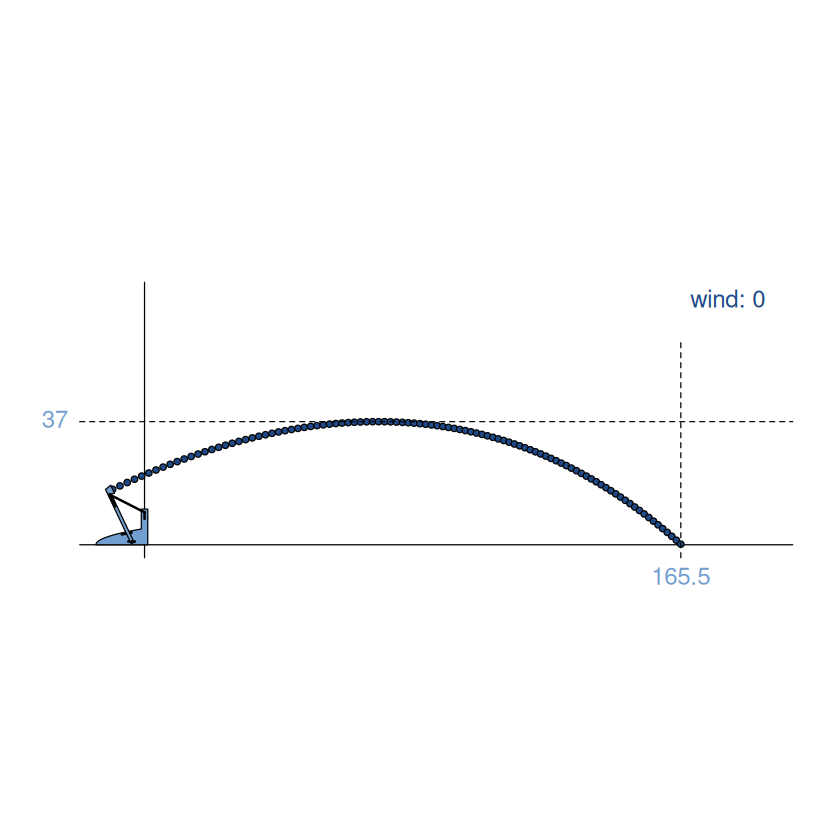


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 4.672815e-03

Parameters at the Solution (parameter, gradient):

 X[ 1] :	1.606057e-01	G[ 1] :	-5.328196e-08
 X[ 2] :	6.966451e-01	G[ 2] :	-5.053354e-08
 X[ 3] :	1.000000e+00	G[ 3] :	1.093957e-02
 X[ 4] :	1.000000e+00	G[ 4] :	1.064650e-01

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:50 2024
Total run time : 0 hours 0 minutes and 0 seconds

optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -130.1494 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       130.15  |proj g|=        1.467
At iterate     1  f =       128

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


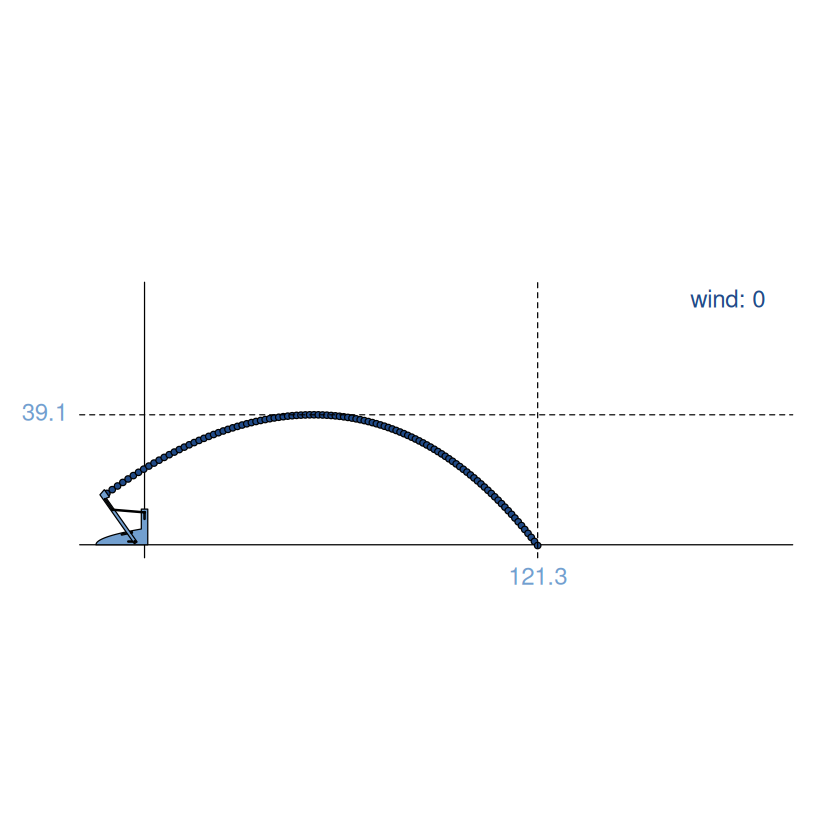


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 1.467875e-05

Parameters at the Solution (parameter, gradient):

 X[ 1] :	2.378238e-01	G[ 1] :	-6.403990e-10
 X[ 2] :	1.000000e+00	G[ 2] :	4.341396e-04
 X[ 3] :	1.000000e+00	G[ 3] :	2.212121e-04
 X[ 4] :	0.000000e+00	G[ 4] :	-9.929600e-05

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:50 2024
Total run time : 0 hours 0 minutes and 0 seconds


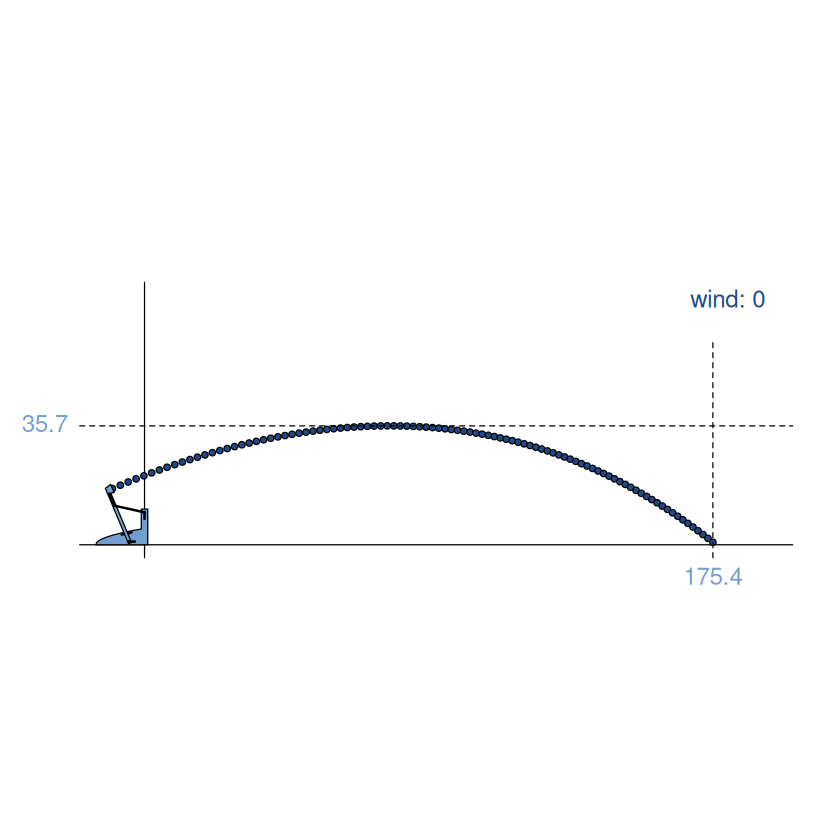


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -144.173 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       144.17  |proj g|=       1.5303
At iterate     1  f =       135.08  |proj g|=       0.97761
At iterate     2  f =       131.81  |proj g|=        1.4649
At iterate     3  f =       130.08  |proj g|=        0.6657
At iterate     4  f =       128.14  |proj g|=       0.62594
At iterate     5  f =       127.48  |proj g|=         1.411
At iterate     6  f =       127.33  |proj g|=        1.3887
At iterate     7  f =       127.25  |proj g|=       0.39174
At iterate     8  f =       127.19  |proj g|=      

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


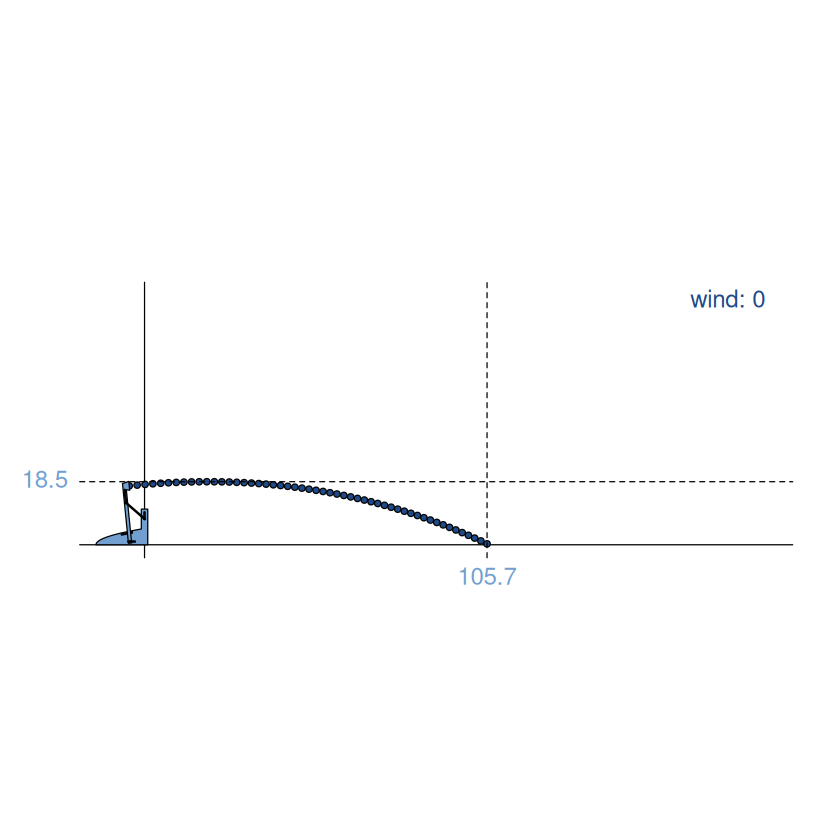


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 5.461880e-04

Parameters at the Solution (parameter, gradient):

 X[ 1] :	5.719685e-01	G[ 1] :	-8.838330e-08
 X[ 2] :	1.000000e+00	G[ 2] :	2.758298e-02
 X[ 3] :	6.117836e-01	G[ 3] :	-3.952285e-09
 X[ 4] :	1.000000e+00	G[ 4] :	1.062526e-02

Solution Found Generation 12
Number of Generations Run 12

Thu Sep 19 14:40:51 2024
Total run time : 0 hours 0 minutes and 1 seconds


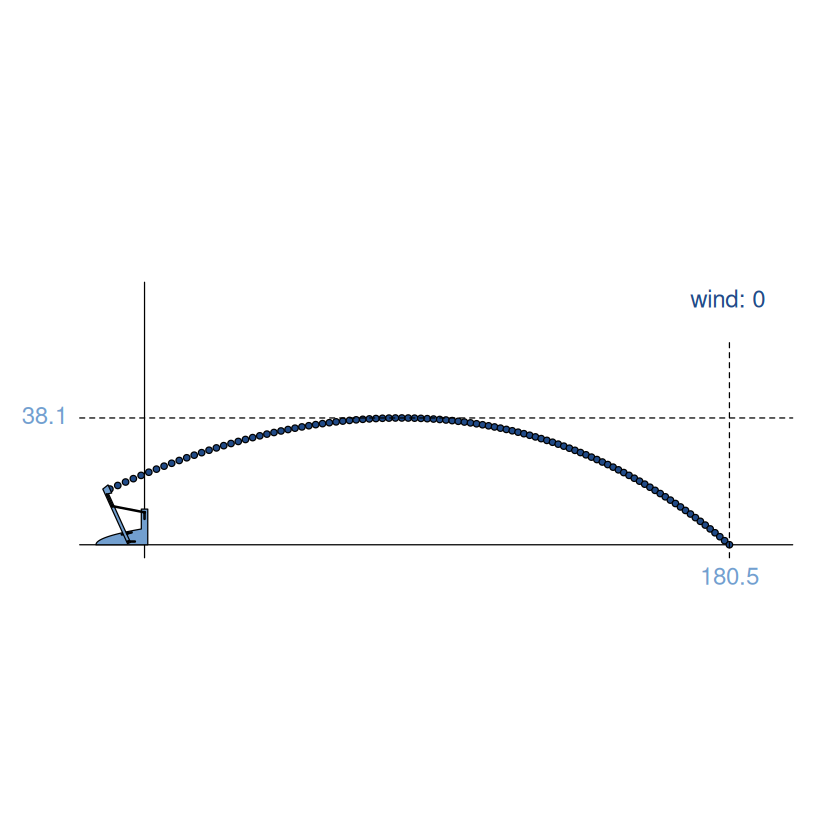


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -142.5099 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       142.51  |proj g|=       1.5176
At iterate     1  f =       138.77  |proj g|=       0.73358
At iterate     2  f =       138.52  |proj g|=       0.71493
At iterate     3  f =        136.8  |proj g|=        1.4411
At iterate     4  f =          136  |proj g|=         1.425
At iterate     5  f =       135.68  |proj g|=        1.1008
At iterate     6  f =        135.6  |proj g|=       0.37608
At iterate     7  f =       135.49  |proj g|=        1.3482
At iterate     8  f =       135.22  |proj g|=     

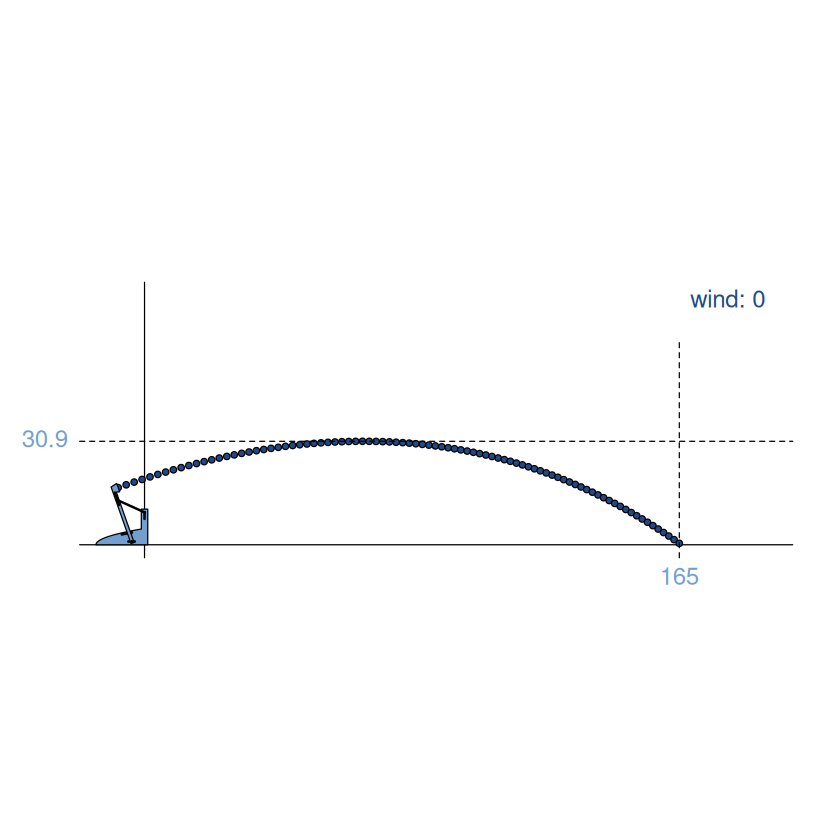


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.918871 1.763796 1.891678 1.856074 
  - best initial criterion value(s) :  -143.8856 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       143.89  |proj g|=       1.6126
At iterate     1  f =       138.33  |proj g|=        1.3817
At iterate     2  f =       137.93  |proj g|=        1.4076
At iterate     3  f =       137.74  |proj g|=        1.4046
At iterate     4  f =       137.48  |proj g|=       0.59424
At iterate     5  f =       137.45  |proj g|=        0.5905
At iterate     6  f =       137.28  |proj g|=       0.64809
At iterate     7  f =       137.25  |proj g|=       0.58925
At iterate     8  f =       137.23  |proj g|=     

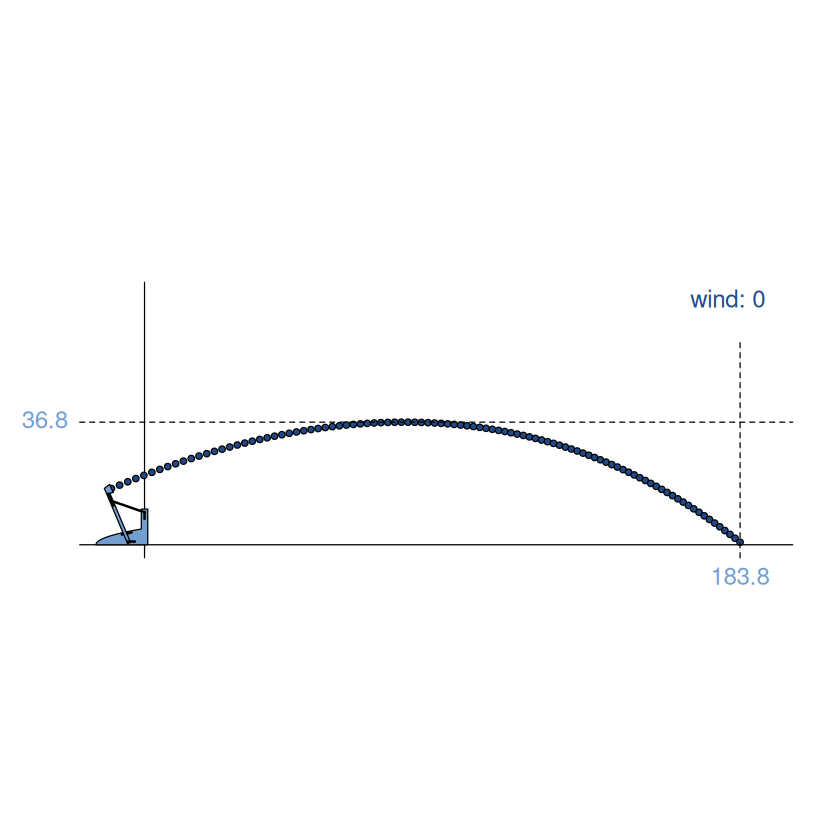

In [10]:
# Do a loop to automatize the process (for noise-free observations, you can also use EGO.nsteps)
nsteps <- 20
mGP <- mGP0
EGOpar <- matrix(NA, nrow = nsteps, ncol = d)
EGOvalue <- rep(NA, nsteps)
for (i in 1:nsteps){
    oEGO <- max_EI(model = mGP, lower = rep(0, d), upper = rep(1, d))
    newX <- EGOpar[i, ] <- oEGO$par
    newy <- EGOvalue[i] <- runExperimentFun(newX)
    mGP <- update(mGP, newX, newy)
}

bestIndex <- which.min(EGOvalue)
cat("longest shot observed:", - round(EGOvalue[bestIndex], 2),
    "\ncorresponding input values:", round(EGOpar[bestIndex, ], 2))


Global minimum found by EGO:

[1] 0.06352897 0.64463852 0.00000000 1.00000000

[1] -183.8809

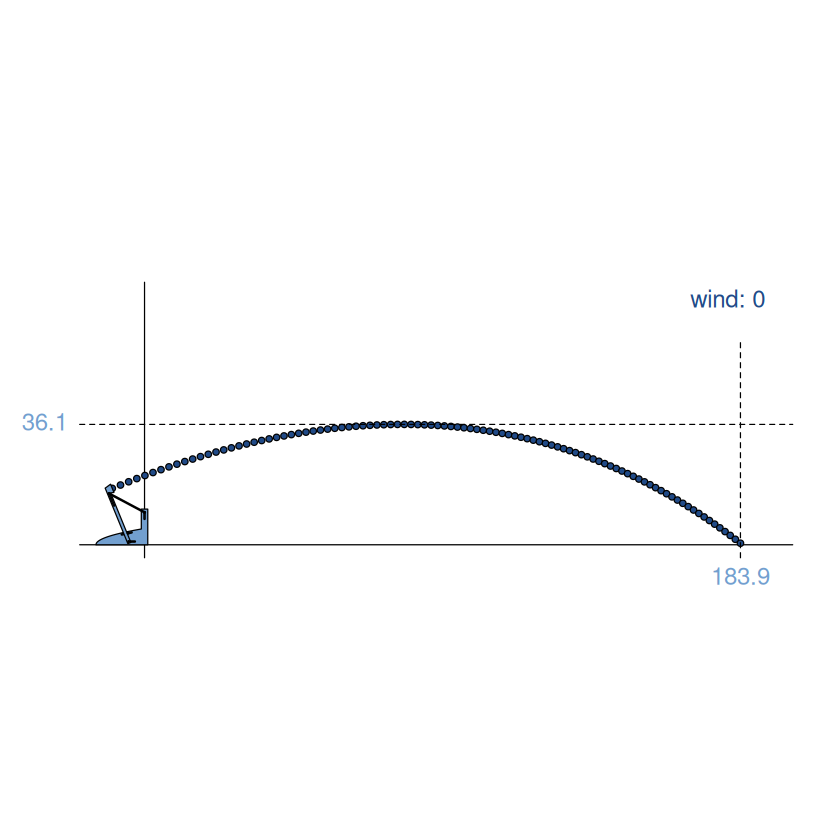

In [11]:
EGOpar[bestIndex, ]
runExperimentFun(EGOpar[bestIndex, ])

Let us visualize the 20 points computed with EGO in the X-Y space, and in time order.

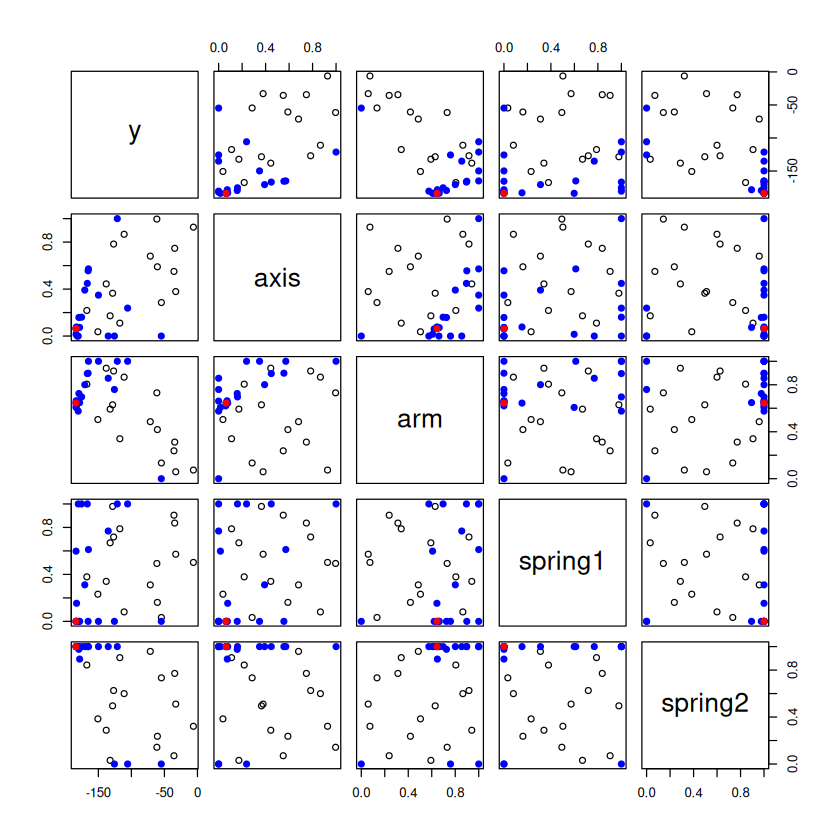

In [12]:
visualizeEGO <- function(initDesign, initValues, EGOpoints, EGOvalues){
  bestIndex <- which.min(EGOvalues)
  y <- c(initValues, EGOvalues, EGOvalues[bestIndex])
  X <- rbind(initDesign, EGOpoints, EGOpoints[bestIndex, ])
  nsteps <- nrow(EGOpoints)
  pairs(cbind(y, X), 
        col = c(rep("black", ninit), rep("blue", nsteps), "red"),
        pch = c(rep(1, ninit), rep(19, nsteps + 1)))
}

visualizeEGO(initDesign = X, initValues = Y,
             EGOpoints = EGOpar, EGOvalues = EGOvalue)

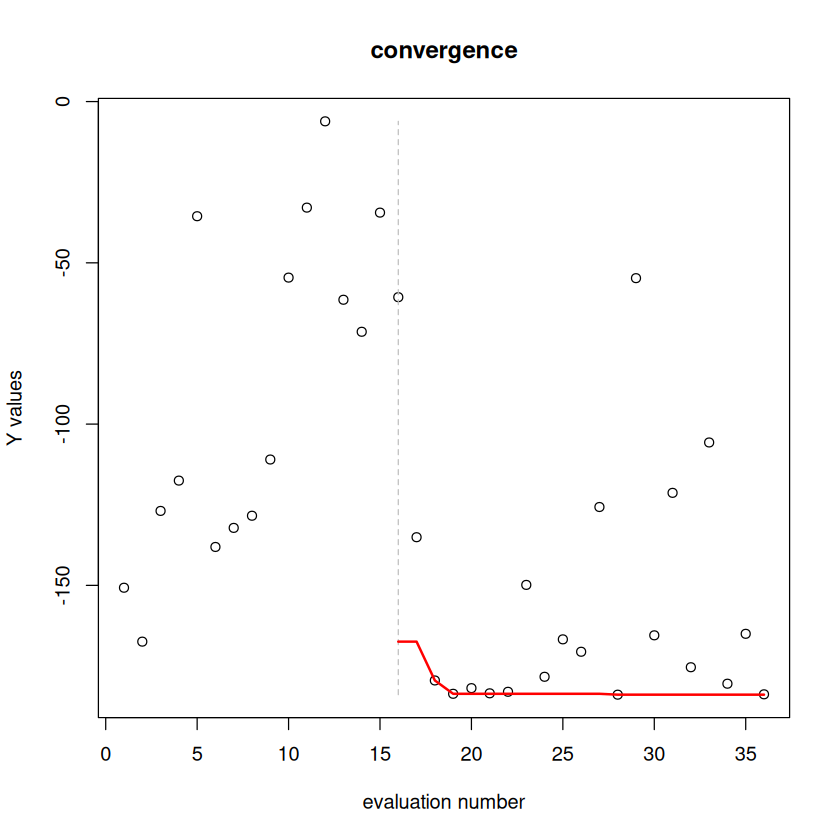

In [13]:
plot(c(Y, EGOvalue), main = "convergence", xlab = "evaluation number", ylab = "Y values")
lines(rep(ninit, 2), range(Y, EGOvalue), lty = 2, col = "gray")
lines(ninit + 0:nsteps, cummin(c(min(Y), EGOvalue)), col = "red", lwd = 2)

 Questions : 
 * *Why the EGO method would be much less efficient by using a linear model instead of a GP model?*
 * *Modify the code in order to deal with noisy observations, with the EQI criterion (mind using the argument 'noise.var' in 'km').*
 * *Investigate the influence: [a] of a trend in the model (change 'formula' in 'km'); [b] of a kernel; [c] of the initial sample size.*
 * *Adapt the EGO method in order to provide a batch of 2 points at one (function qEGO.nsteps), which is useful in practice, as the 2 runs of the time-consuming simulator can be done in parallel.*

Bonus : As the function is quick to evaluate, compare the result with the maximum value obtained with a standard optimizor (from library nloptr for instance). You can use the 'runExperimentFun' function defined above.